# Python Workshop 6 

### Summary of Workshop 5

- AI and ML Overview: Basics of artificial intelligence and machine learning.
- Problem Types: Categorization based on input precision and solution nature.
- ML Implementation Steps:
- Data collection, preparation, and analysis.
- Algorithm training, testing, and application.
- Supervised Learning Focus: Introduction to learning from labeled data.
- Key Algorithms: Overview of Linear Regression and Support Vector Machine (SVM).

# Introduction to Unsupervised Learning and Evaluation Metrics

This lesson will introduce the foundational concepts of unsupervised learning, covering its distinction from supervised learning and the key techniques employed, speficially clustering (e.g., K-means, DBSCAN). By exploring these methods, you will gain insights into how unsupervised learning algorithms analyze and draw conclusions from complex datasets to uncover hidden structures and relationships.

A critical component of this lesson is understanding how to evaluate the performance of learning models. We will delve into various evaluation metrics. This will be a necessary tool and knowledge to apply machine learning techniques effectively, enabling them to extract valuable insights from unlabeled data in real-world applications.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs, make_moons
from sklearn.linear_model import LogisticRegression

## Chapter 1. Unsupervised Learning: Definition and Overview

Unsupervised learning in artificial intelligence is a type of machine learning that learns from data without human supervision. Unlike supervised learning, unsupervised machine learning models are given unlabeled data and allowed to discover patterns and insights without any explicit guidance or instruction. 

For example, given the diagram below, you need to be able to find a pattern from it.

<function matplotlib.pyplot.show(close=None, block=None)>

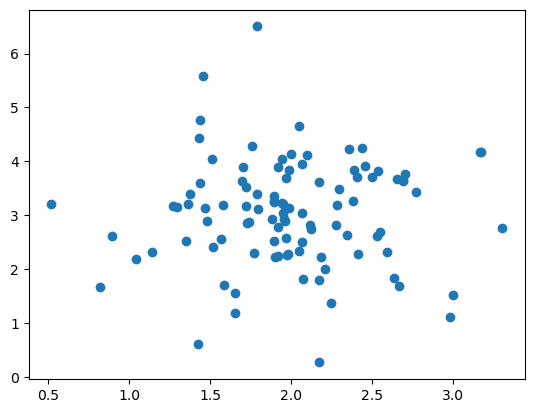

In [2]:
xsA=np.random.normal(2, 0.5, 100)
ysA=np.random.normal(3, 1, 100)

plt.scatter(xsA,ysA)
plt.show

### How does unsupervised learning work?

As the name suggests, unsupervised learning uses self-learning algorithms. They learn without any labels or prior training. Instead, the model is given raw, unlabeled data and has to infer its own rules and structure the information based on similarities, differences, and patterns without explicit instructions on how to work with each piece of data.

### Why is it useful?

Unsupervised learning algorithms are better suited for more complex processing tasks, such as organizing large datasets into clusters. They are useful for identifying previously undetected patterns in data and can help identify features useful for categorizing data. 

Imagine that you have a large dataset about weather. An unsupervised learning algorithm will go through the data and identify patterns in the data points. For instance, it might group data by temperature or similar weather patterns. 

While the algorithm itself does not understand these patterns based on any previous information you provided, you can then go through the data groupings and attempt to classify them based on your understanding of the dataset. For instance, you might recognize that the different temperature groups represent all four seasons or that the weather patterns are separated into different types of weather, such as rain, sleet, or snow. 

![alt text](photos/clusters.jpg)

Furthermore, unsupervised learning is used for reducing the number of variables under consideration and remove irrelevant features (dimensionality reduction), and identify outliers or anomalous instances in the data (anomaly detection). Some real life examples of uses of dimensionality reduction and anomalous instances are:
- **Fraud Detection in Banking and Finance**: Anomaly detection algorithms can identify unusual transactions, such as large withdrawals or foreign transactions, that could indicate credit card fraud or identity theft.
- **Image Recognition and Compression**: In image recognition tasks, such as facial recognition systems, dimensionality reduction are used to reduce the number of pixels in images while retaining essential features necessary for accurate identification.

### Integration with Supervised Learning

Unsupervised learning can be used alongside supervised learning in several ways, enhancing the model's performance or providing insights that improve the supervised learning task. For example:

- **Feature Learning**: Unsupervised learning can discover useful features or representations in the data that can then be used to improve the performance of a supervised learning algorithm.
- **Data Preprocessing**: Techniques like dimensionality reduction, which we will not look into, can preprocess the data to a more manageable form for supervised learning, potentially improving model performance by focusing on the most informative features.

## Chapter 2. Types of Unsupervised Learning

Unsupervised learning can be broadly categorized into three main types:

- **Clustering**: Clustering is a technique for exploring raw, unlabeled data and breaking it down into groups (or clusters) based on similarities or differences. It is used in a variety of applications, including customer segmentation, fraud detection, and image analysis. Clustering algorithms split data into natural groups by finding similar structures or patterns in uncategorized data. In this workshop, we'll dive deep into this method.
- **Dimensionality Reduction**: Reduces the number of variables under consideration, extracting essential features. It's vital for data visualization, noise reduction, and enhancing model performance.
- **Association**: Association rule mining is a rule-based approach to reveal interesting relationships between data points in large datasets. Unsupervised learning algorithms search for frequent if-then associations—also called rules—to discover correlations and co-occurrences within the data and the different connections between data objects. (need to look into this more) 

![alt text](photos/diagram1.png)

## Chapter 3. Clustering - Theoretical Background

Within the Clustering algorithm group, there are plenty of algorithms however we will be focusing on just 2 only for this workshop, which are K-Means Clustering and Density-Based Spatial Clustering of Applications with Noise (DBSCAN).

### K-Means Clustering

K-means is a centroid-based clustering algorithm that partitions a dataset into K distinct, non-overlapping subsets (clusters) based on the distance to the centroid of the clusters. The algorithm aims to minimize the  the sum of the squared distances between each data point and the centroid of its cluster. Mathematically, the objective function can be expressed as:

$$ J = \sum_{i=1}^{k} \sum_{x \in S_i} \| x - \mu_i \|^2 $$

where:
- *J* is the objective function to be minimized (otherwise known as **inertia**, which we will come back to later),
- *k* is the number of clusters,
- *S_i* is the set of points in the \(i\)th cluster,
- *x* is a point in space,
- *mu_i* is the centroid of points in \(S_i\),

So how do you implement this as an algorithm? The following is a high-level summary of the algorithm steps. 
1. **Initialization:** Choose K initial centroids randomly.
2. **Assignment Step:** Assign each data point to the nearest centroid, thereby forming K clusters. The distance is typically measured using the Euclidean distance, although other distances can be used depending on the context.
3. **Update Step:** Recalculate the centroids of the clusters by taking the mean of all points assigned to each cluster.
4. **Repeat:** Repeat the assignment and update steps iteratively until the centroids do not change significantly, indicating convergence, or a predefined number of iterations is reached.

So from the algorithm, we can make out a few key ideas which are:
- It requires the number of clusters (K) to be specified in advance.
- It works well with clusters of similar size and density.
- The algorithm is sensitive to the initial selection of centroids.
- It may converge to a local optimum, depending on the initial centroid placement.

![alt text](photos/KmeansClustering.gif)

### Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

DBSCAN is a popular clustering algorithm that groups together closely packed points by identifying clusters of arbitrary shape in spatial data, marked by areas of high density separated by areas of low density. Unlike K-means, DBSCAN does not require the user to specify the number of clusters in advance.

Before going into the algorithm, there are a few core concepts that needs to be understood first.

- **ϵ-Neighborhood:** For a point p, the ϵ-neighborhood is defined as:
$$N_\epsilon(p) = \{q \in D | \text{dist}(p, q) \leq \epsilon\}$$ 
where dist(p, q) is the distance between points p and q, and D is the dataset.
- **Minimum Points (MinPts):** The minimum number of points required to form a dense region. A point p is a core point if $$|N_\epsilon(p)| \geq \text{MinPts}$$.
- **Directly Density-Reachable:** A point p is directly density-reachable from a point q if p is within the ϵ-neighborhood of q and q is a core point.
- **Density-Reachable:** A point p is density-reachable from a point q if there is a chain of points p_1, ..., p_n where p_1 = q and p_n = p, and each p_i+1 is directly density-reachable from p_i.

Now with an understanding of the core concepts, we can look at the algorithm steps of DBCSCAN.

1. **For each point in the dataset:** If the point has not been visited, retrieve its ϵ-neighborhood, and mark it as visited.
2. **Check for Core Points:** If the ϵ-neighborhood of a point contains at least MinPts, it's marked as a core point, and a new cluster is started. Otherwise, it's marked as noise (which may later be included in a cluster as a border point).
3. **Expand Cluster:** If a point is a core point, add all points density-reachable from it to the cluster and check if all the density-reachable is another core point or a border point. If it's a core point, repeat step 3.
4. **Iterate:** Continue the process for each unvisited point, either adding it to an existing cluster or leaving it as noise.

From this, we can see that:
- It does not require the number of clusters to be specified in advance.
- It can discover clusters of arbitrary shapes and sizes.
- It is robust to outliers, treating them as noise.
- We have two hyper-parameters which are ϵ, the maximum distance between two samples for one to be considered as in the neighborhood of the other, and MinPts, the number of samples in a neighborhood for a point to be considered as a core point.
- The choice of ε and MinPts can significantly affect the outcome.

![alt text](photos/DBSCAN.gif)

## Chapter 4.1 Clustering Techniques - K-Means Clustering (from scratch)

So how can we do implement it? Let's generate some new data. We know these are two separate sets of data, as well as their mean and variance, because we generated them, but what if we didn't know these things and needed to separate the data?

<function matplotlib.pyplot.show(close=None, block=None)>

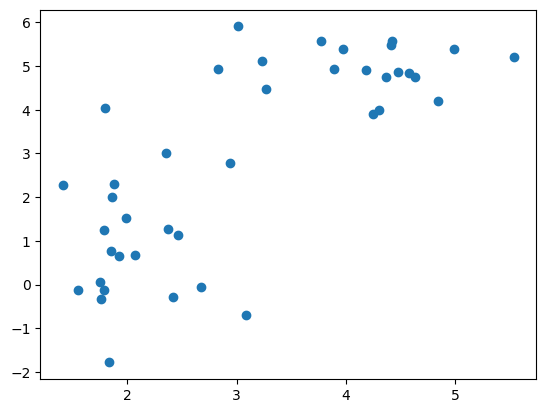

In [3]:
xsA=np.random.normal(2, 0.5, 20)
ysA=np.random.normal(1, 1, 20)

xsB=np.random.normal(4, 0.8, 20)
ysB=np.random.normal(5, 0.5, 20)

xs=np.concatenate((xsA,xsB))
ys=np.concatenate((ysA,ysB))

plt.scatter(xs,ys)
plt.show

### 1. Initializing K centroids randomly
One way to go about it is to generate two random points within the sample space, in this case it is just a 2-dimensional space.

In [4]:
x1=np.random.randint(0,6)
y1=np.random.randint(1,8)

x2=np.random.randint(0,6)
y2=np.random.randint(1,8)

### 2. Assigning each data point to the nearest centroid.
Before assigning, we need to calculate the Euclidean distance from each point to the 2 centroids. 

Euclidean distance is a measure of the true straight line distance between two points in Euclidean space. It's the most common use of distance in geometry, representing the shortest path between two points in a plane or three-dimensional space. The mathematical formula for calculating Euclidean distance between two points, P and Q, with coordinates $$P = (x_1, y_1), Q = (x_2, y_2)$$ in a two-dimensional space is given by:

$$d(P, Q) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

In [5]:
import math

def distance(x1,y1,x2,y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

Then, we need to check for each point which cluster it is closer to, which we can use the ``distance`` which we have written above. 

In [6]:
def findclusters(xs,ys,x1,y1,x2,y2):
    # Initialize empty arrays to hold the points of each cluster
    Axs = np.array([])
    Ays = np.array([])
    Bxs = np.array([])
    Bys = np.array([])

    # Loop through each data point
    for i in range(len(xs)):
        
        # Calculate and compare distances to the two specified points
        if distance(xs[i], ys[i], x1, y1) < distance(xs[i], ys[i], x2, y2):
            # If closer to the first point, add to the first cluster
            Axs = np.append(Axs, xs[i])
            Ays = np.append(Ays, ys[i])
        else:
            # Otherwise, add to the second cluster
            Bxs = np.append(Bxs, xs[i])
            Bys = np.append(Bys, ys[i])

    # Plot the clusters
    plt.scatter(Axs, Ays)
    plt.scatter(Bxs, Bys)
    plt.show()

    # Return the arrays of points for each cluster
    return (Axs, Ays, Bxs, Bys)

### 3. Recalculating the centroids as the center of the assigned data points.

Once we've done this for all points we need to recalculate the cluster centers. We do that by taking the average x and y coordinates of each of the two lists.

In [7]:
def average(xs,ys):
    x=sum(xs)/len(xs)
    y=sum(ys)/len(ys)
    return x,y

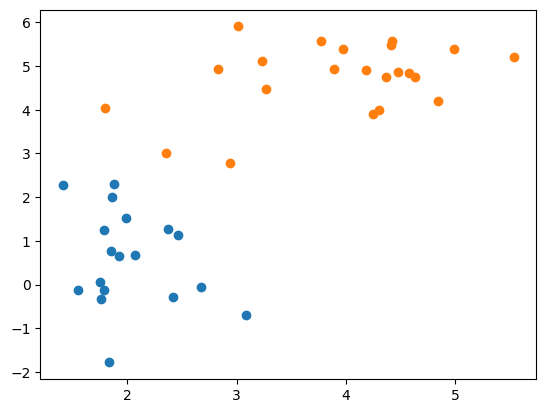

In [8]:
Axs,Ays,Bxs,Bys=findclusters(xs,ys,x1,y1,x2,y2)

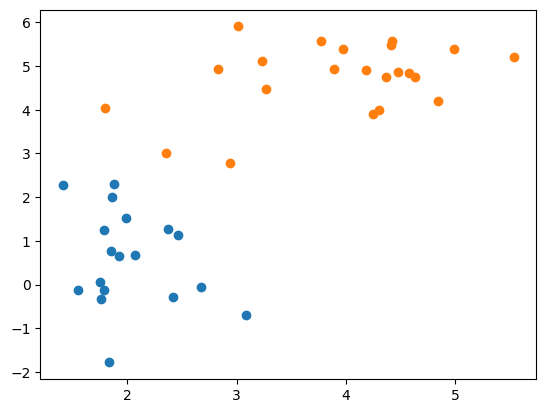

In [9]:
# Calculate average x and y coordinates of each of the two lists.
x1,y1=average(Axs,Ays)
x2,y2=average(Bxs,Bys)

Axs,Ays,Bxs,Bys=findclusters(xs,ys,x1,y1,x2,y2)

As you can see from the two graphs, there is some points that has changed its label. However, there is a lot of improvements that can still be made, so we can put what we made so far into an iterative proceedure.

### 4. Repeating steps 2 and 3 until the centroids no longer move significantly.

In [10]:
def kmeans(i,xs,ys,x1,y1,x2,y2):
    for j in range(i):
        Axs,Ays,Bxs,Bys=findclusters(xs,ys,x1,y1,x2,y2)
        x2,y2=average(Bxs,Bys)
        x1,y1=average(Axs,Ays)

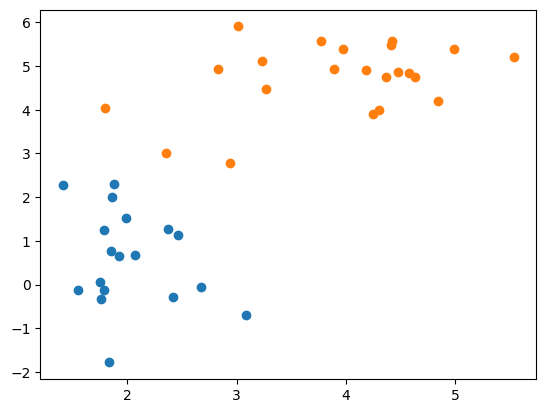

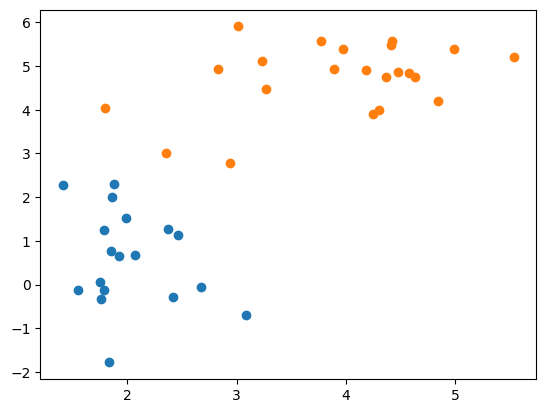

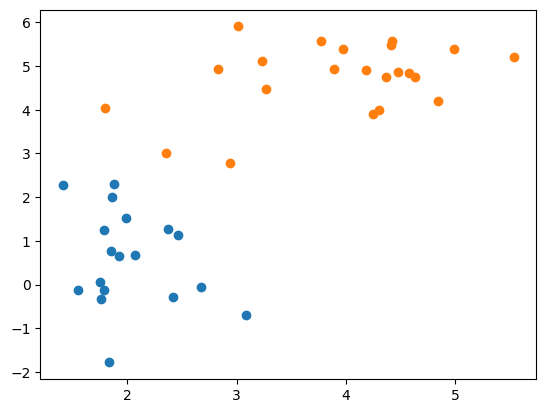

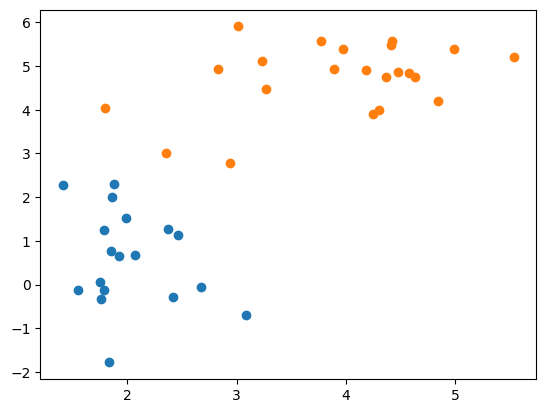

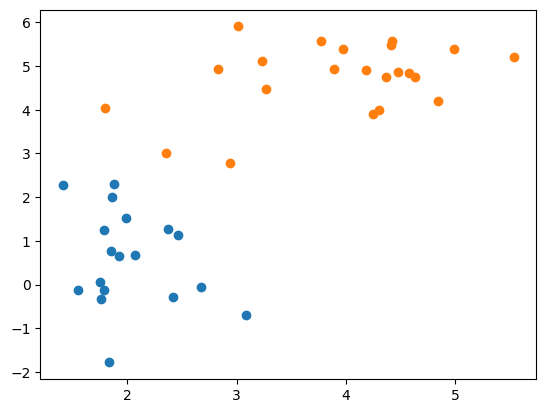

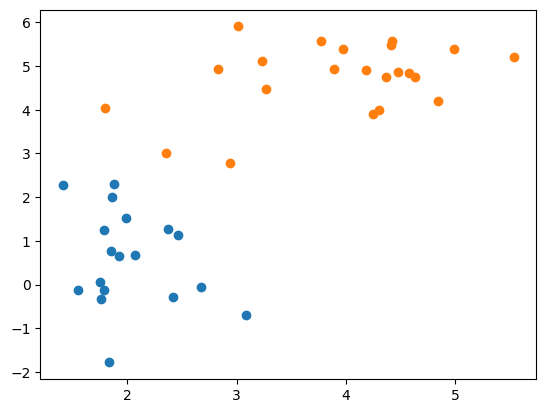

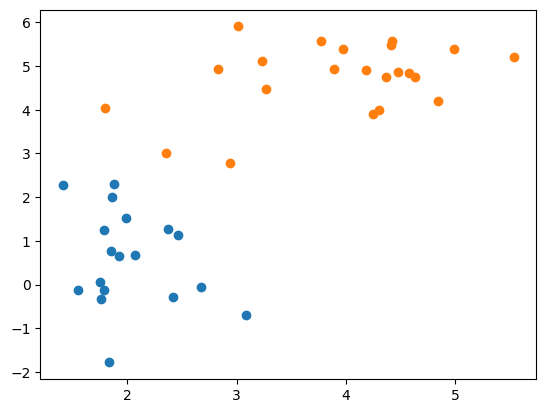

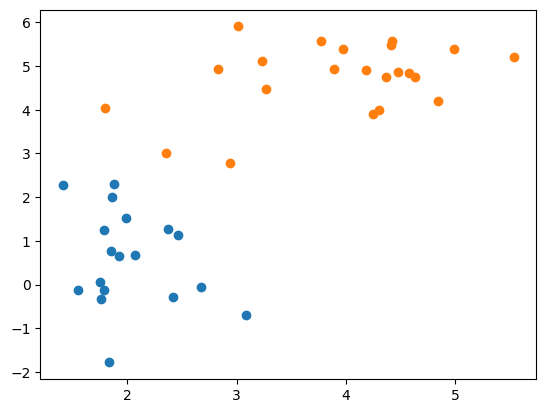

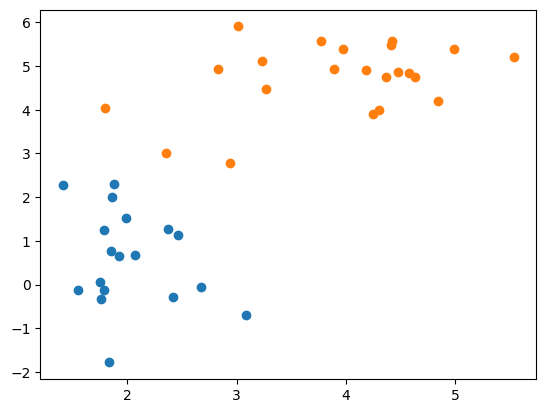

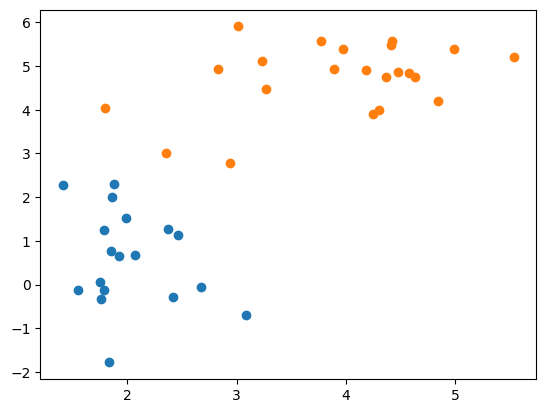

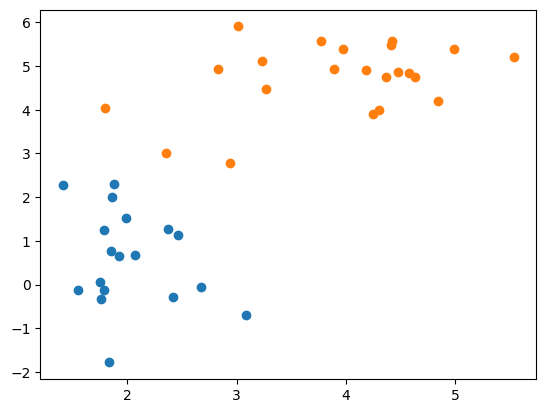

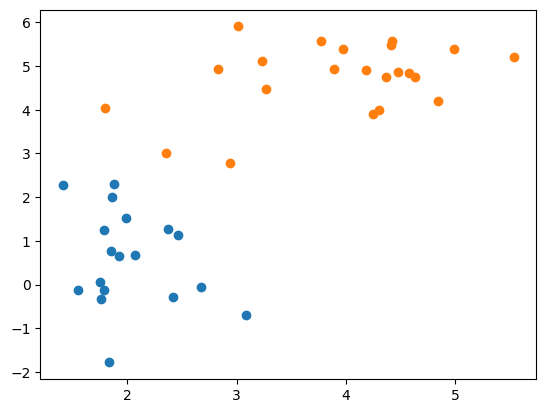

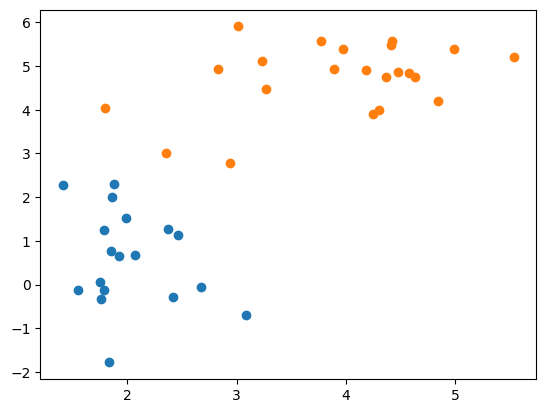

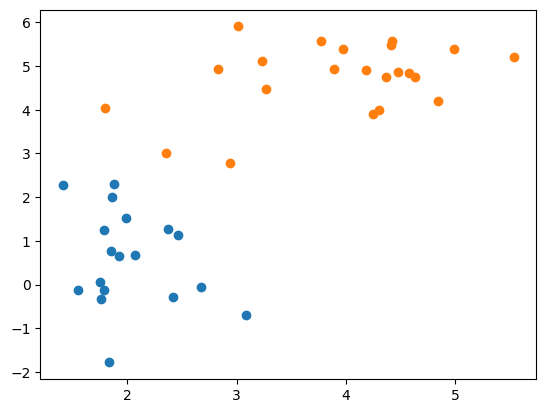

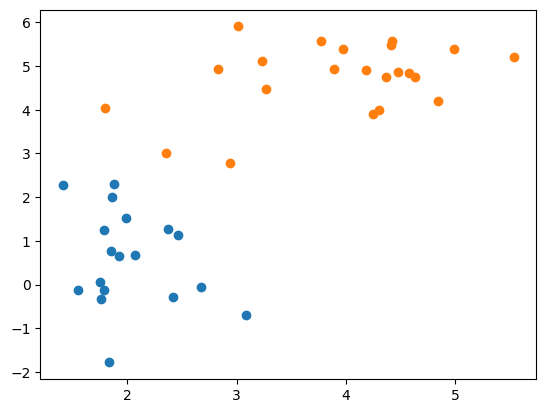

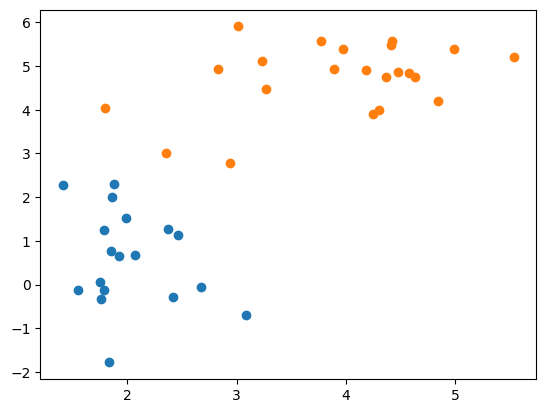

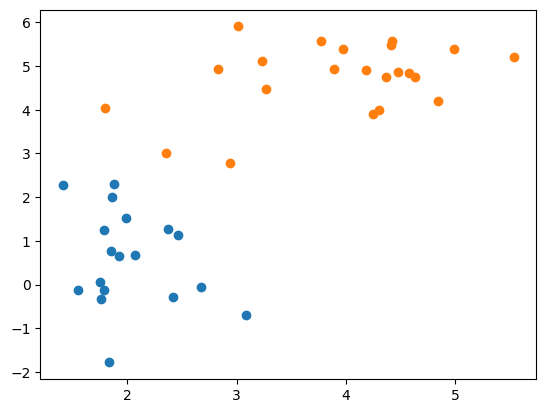

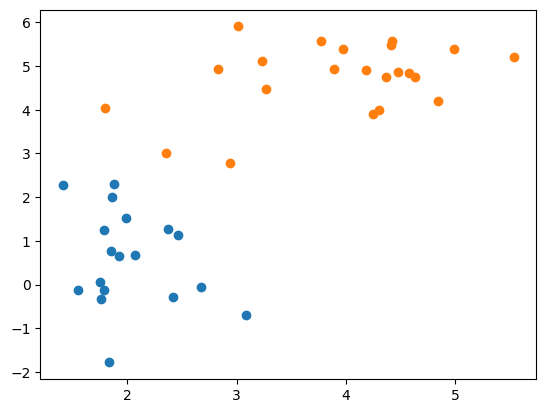

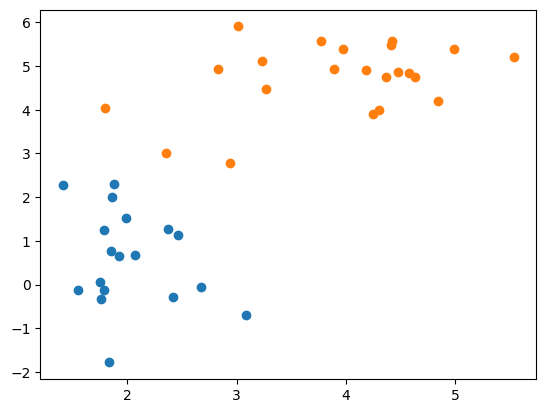

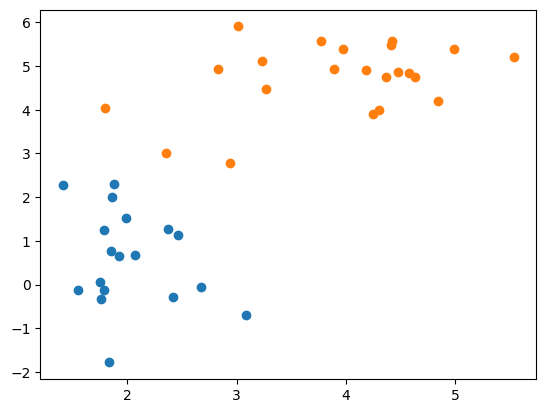

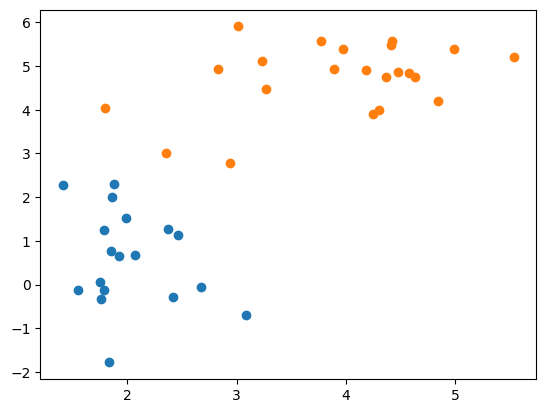

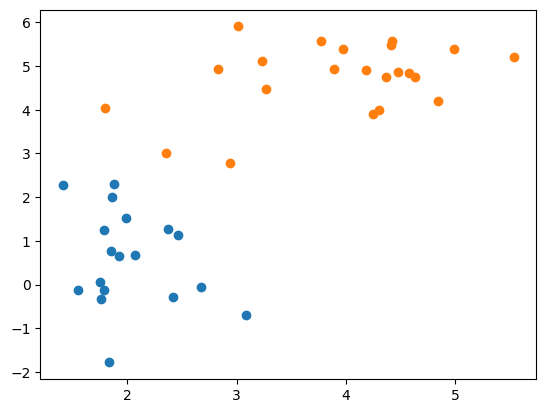

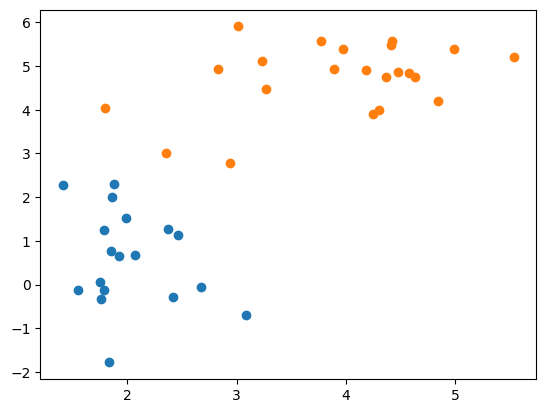

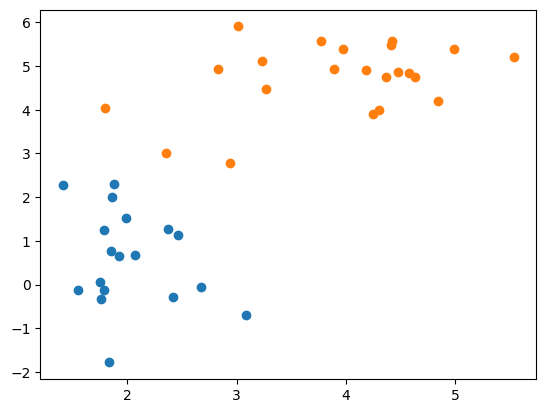

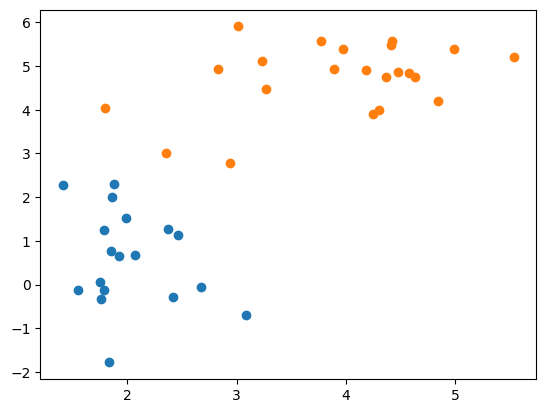

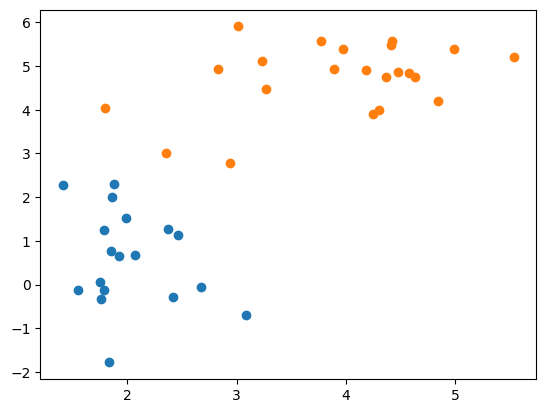

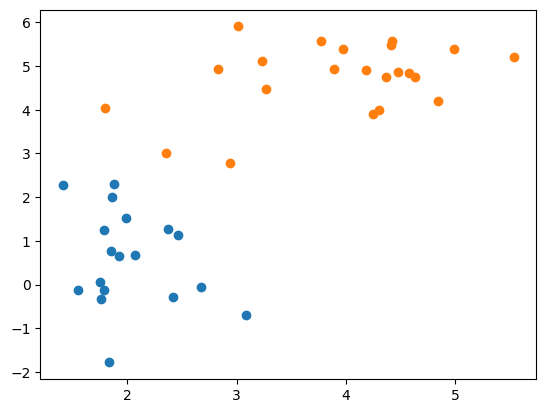

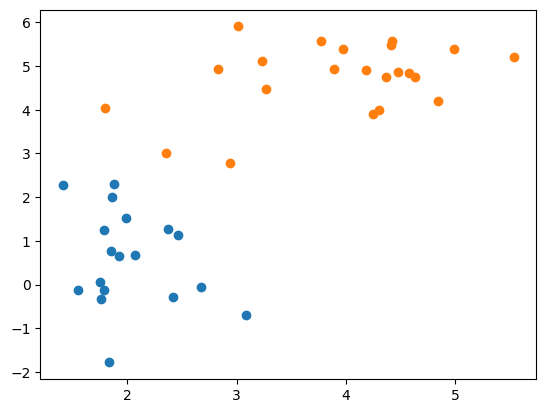

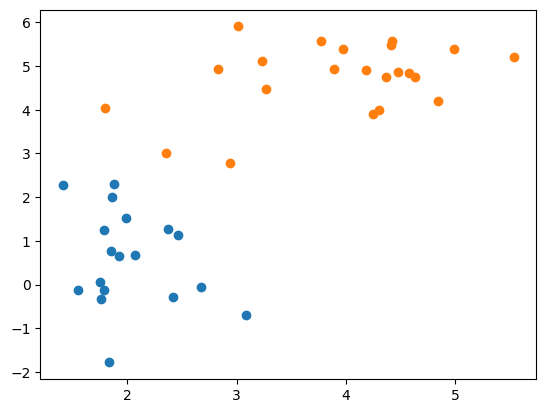

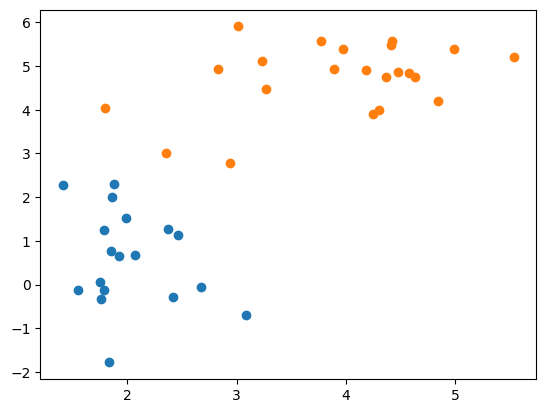

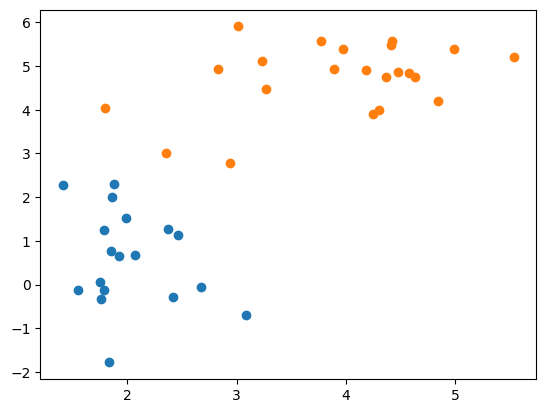

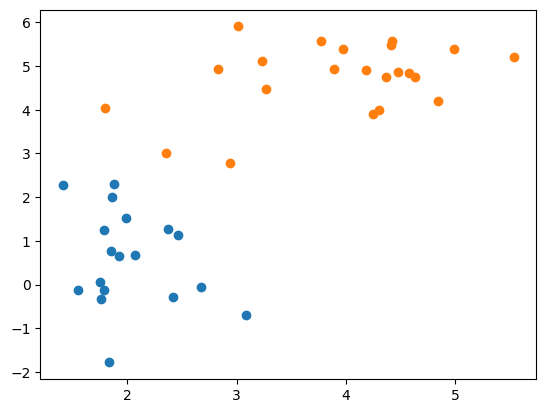

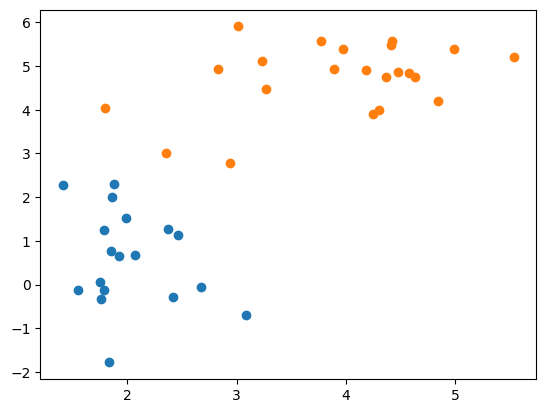

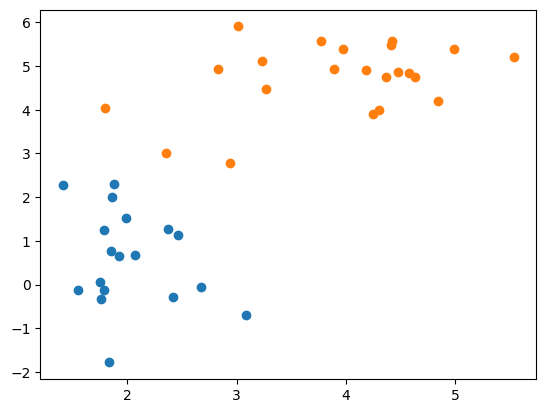

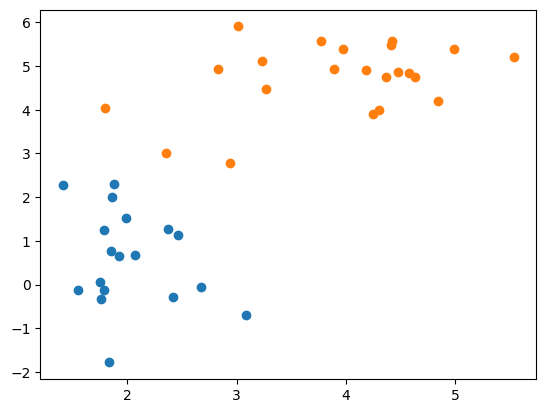

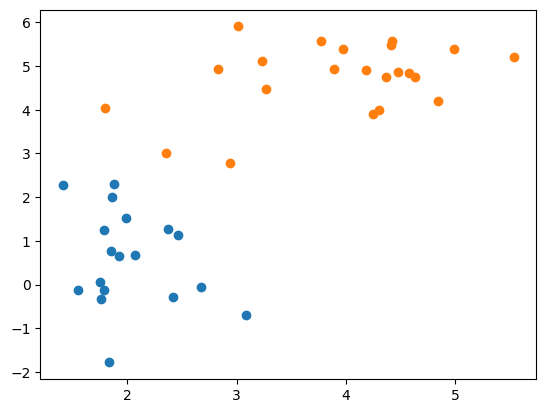

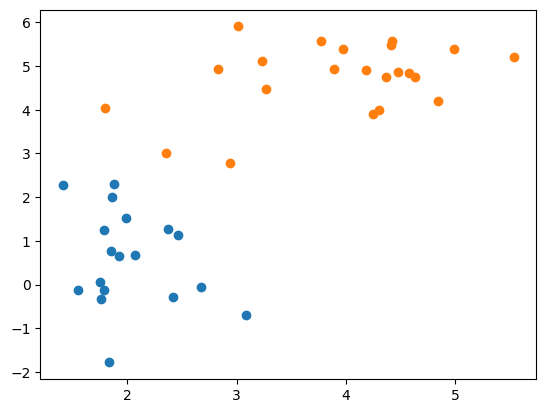

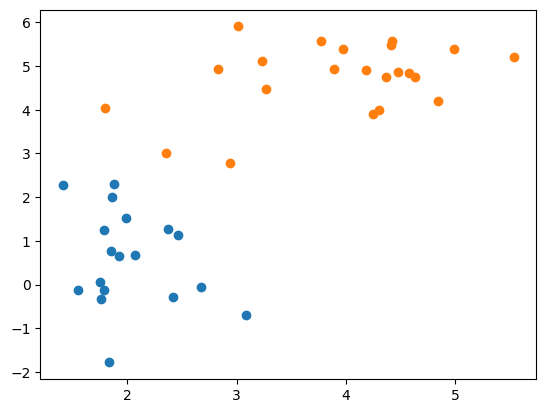

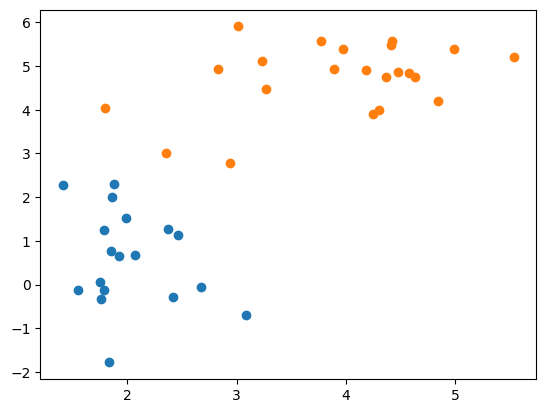

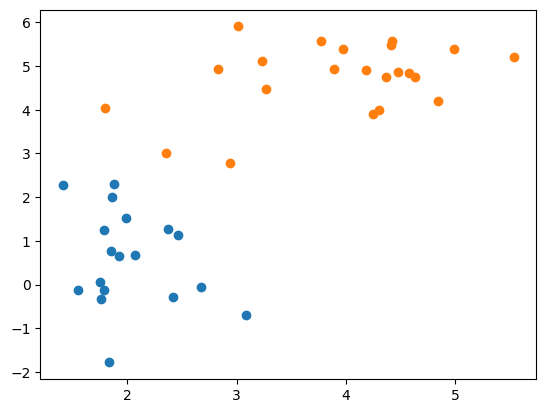

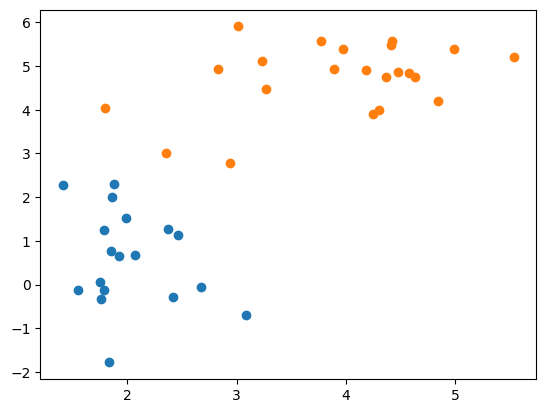

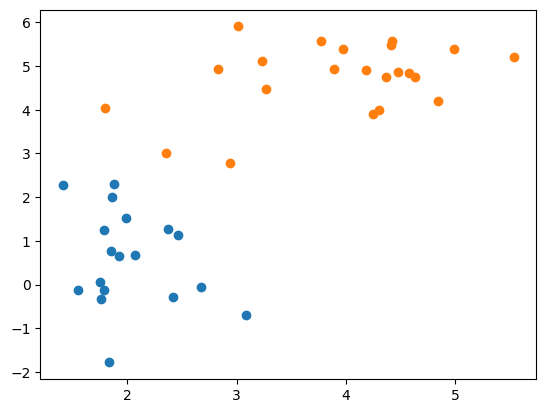

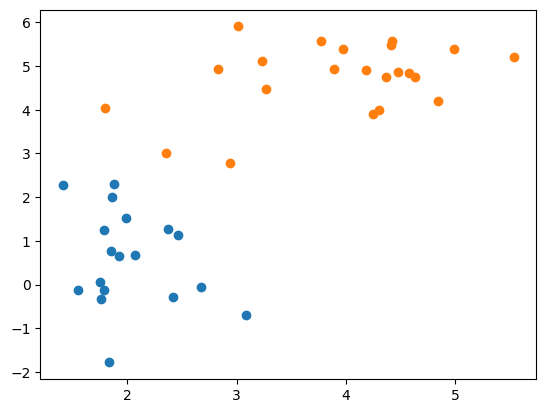

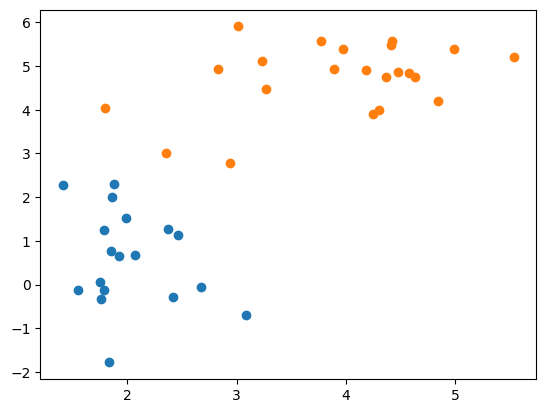

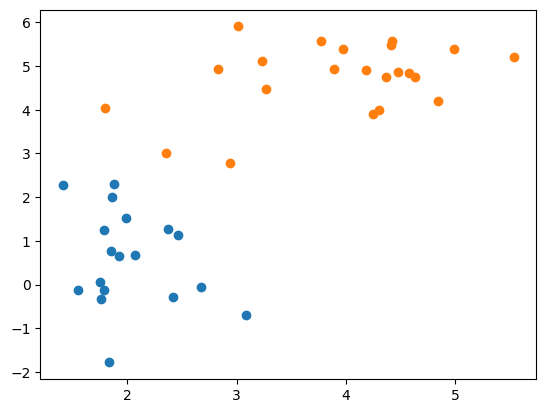

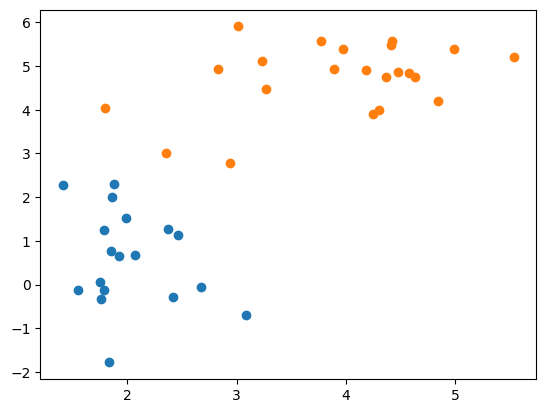

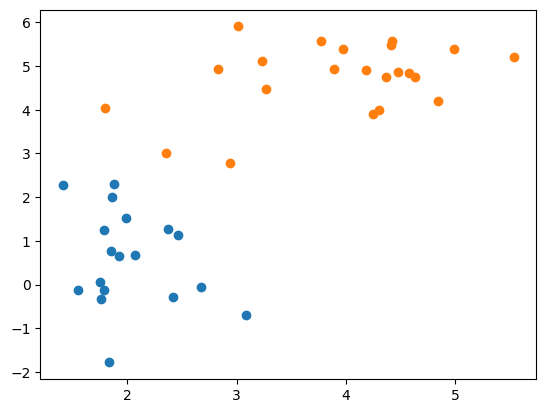

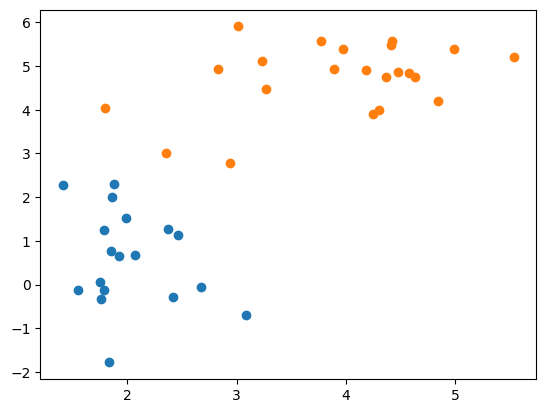

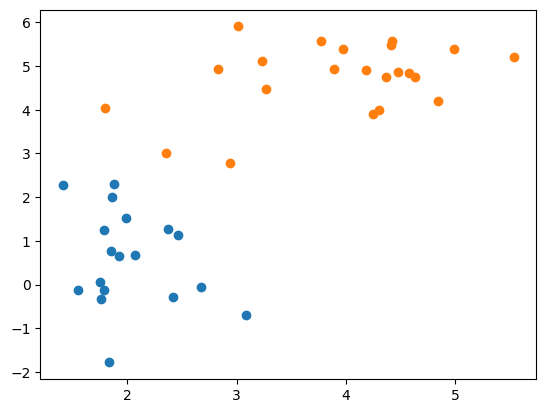

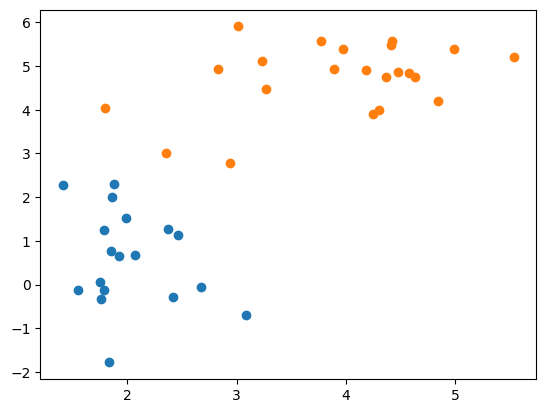

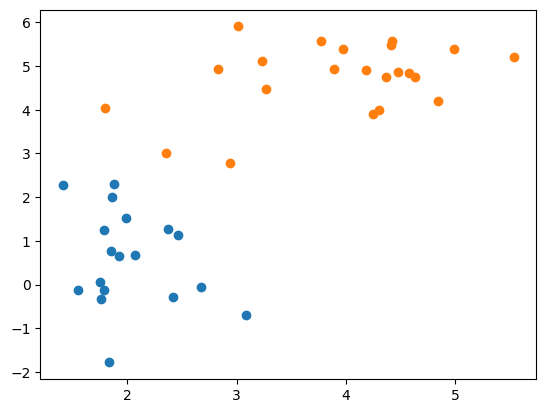

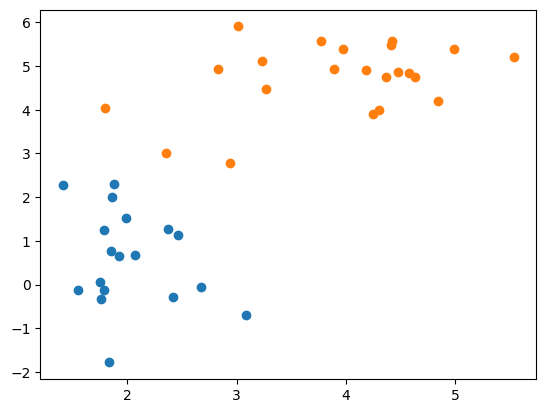

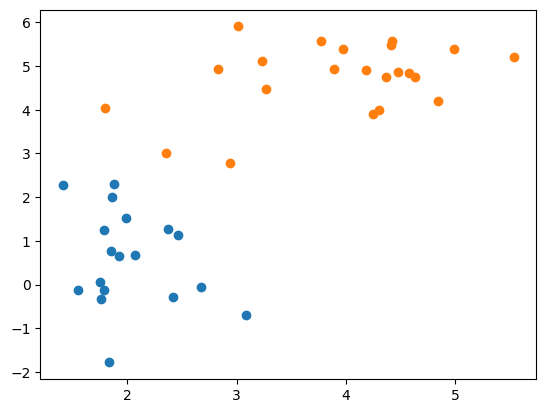

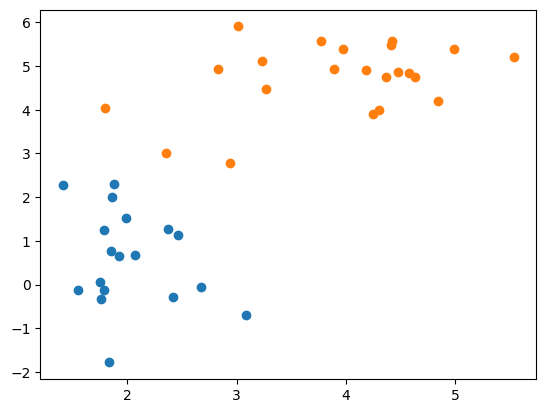

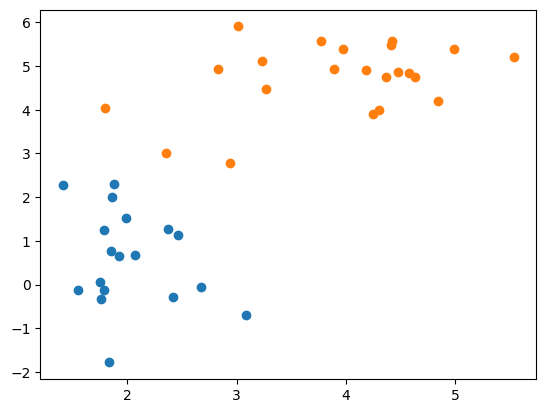

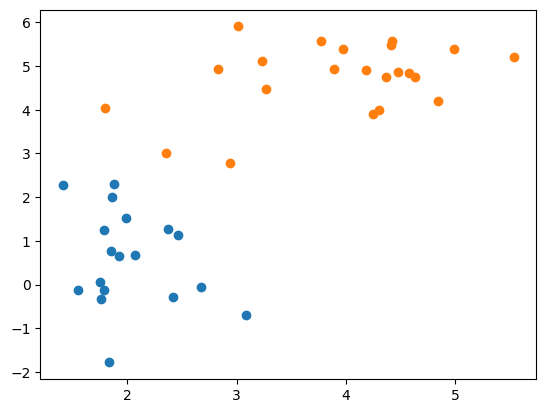

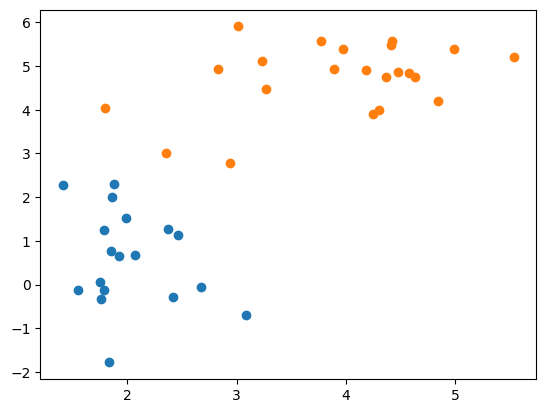

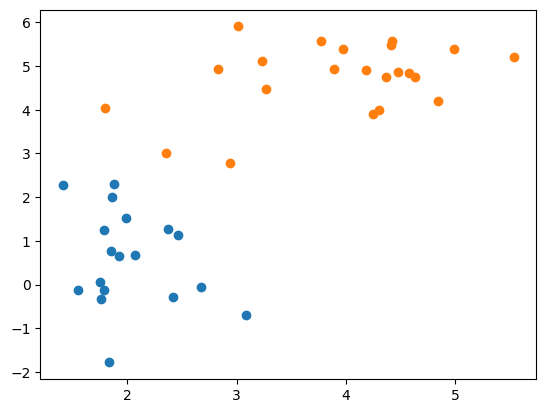

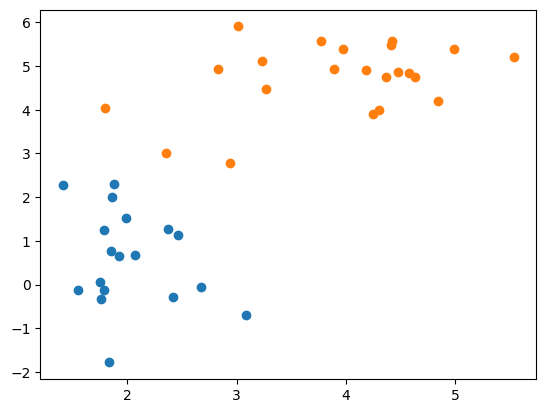

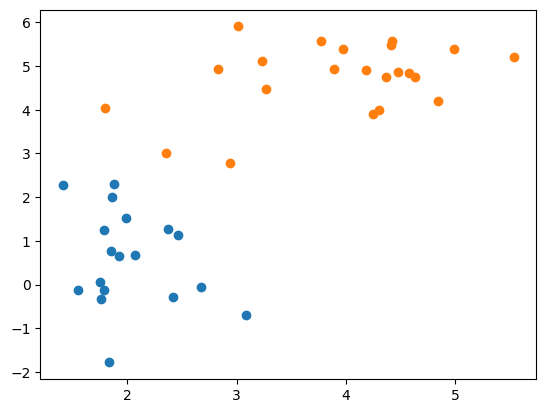

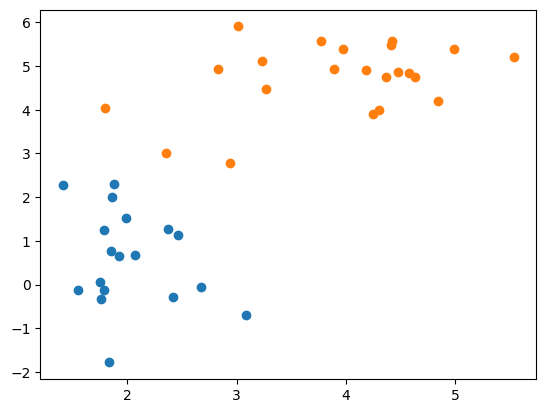

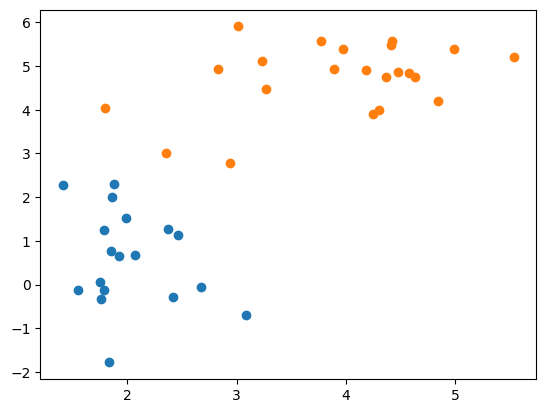

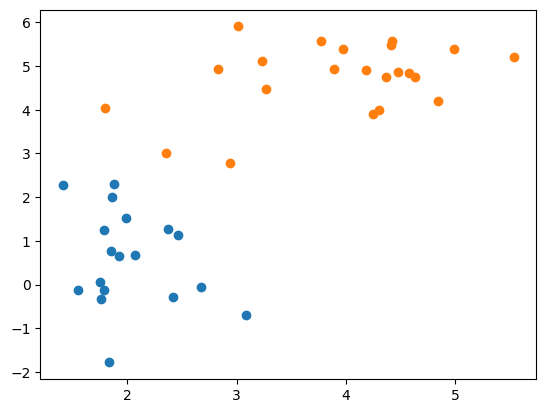

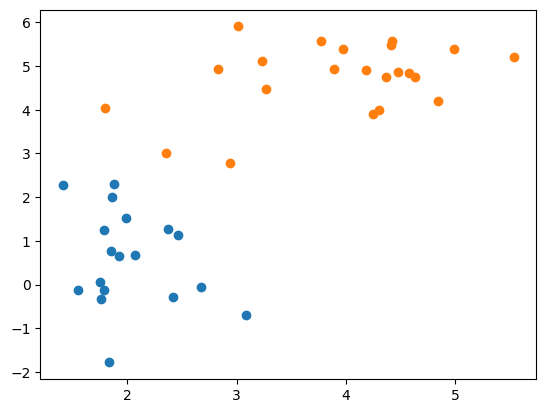

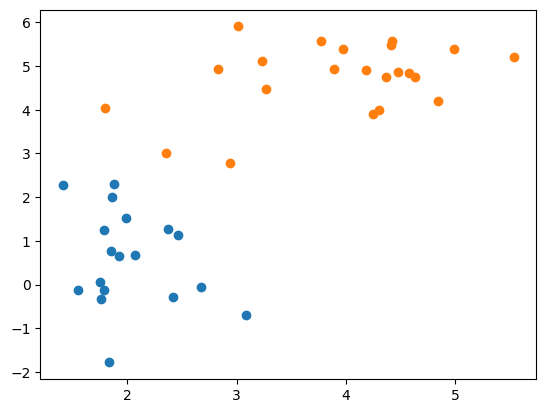

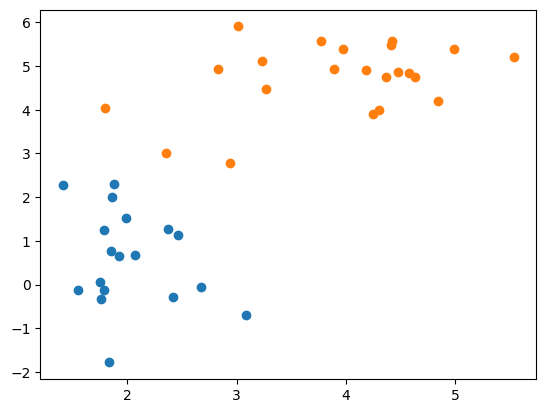

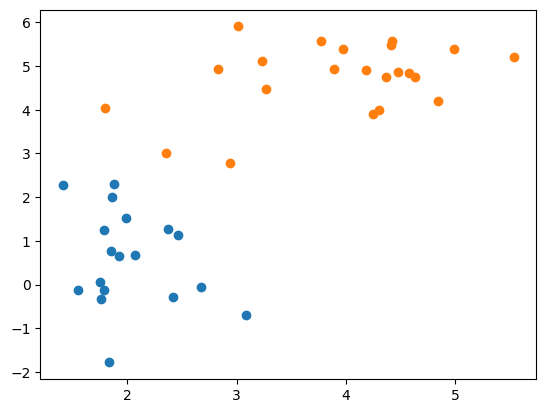

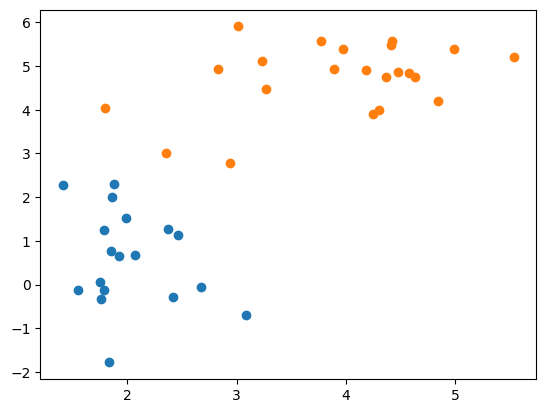

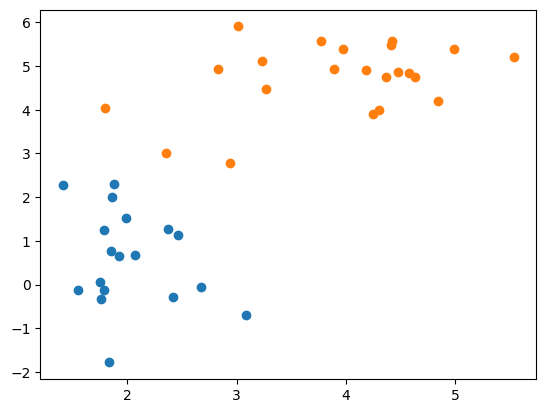

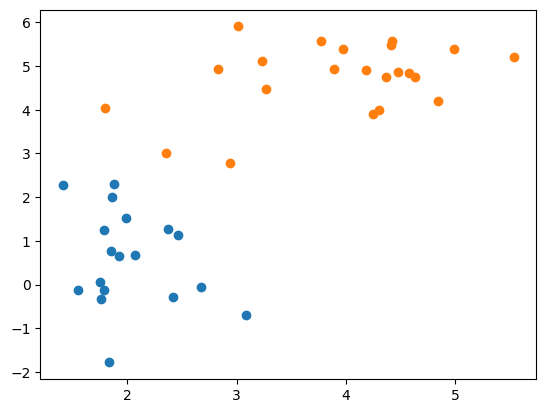

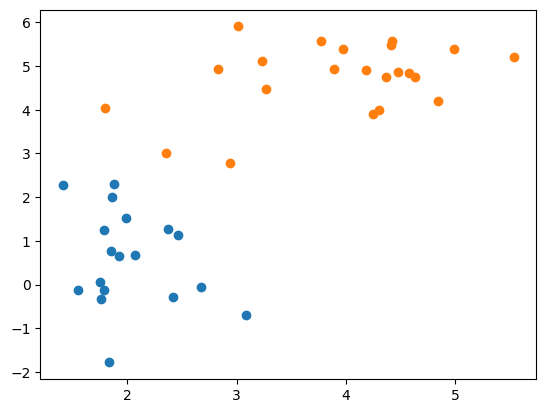

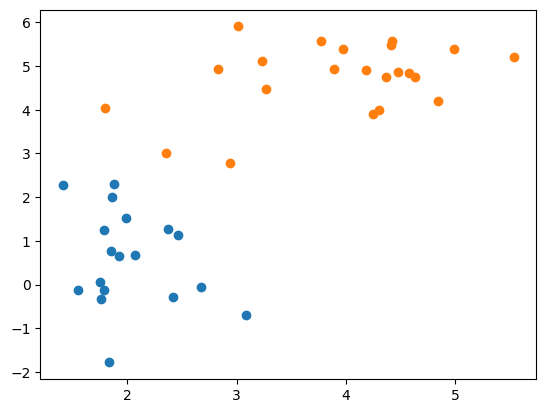

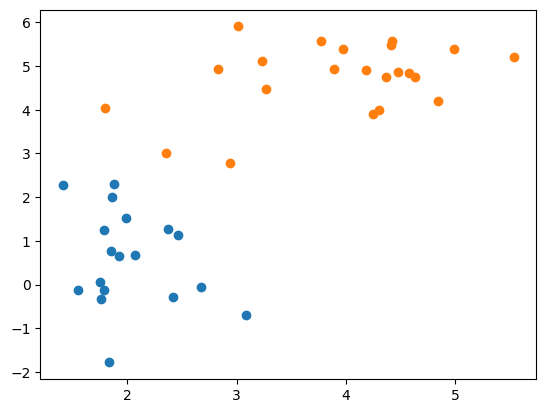

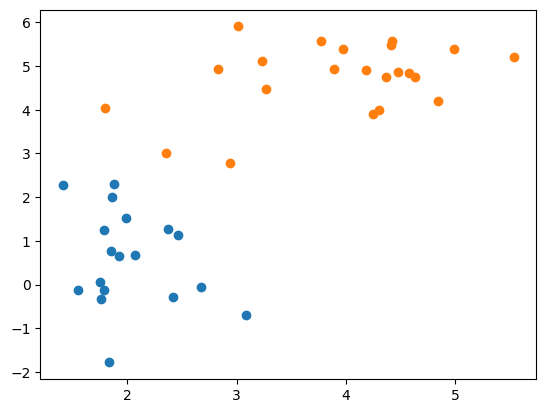

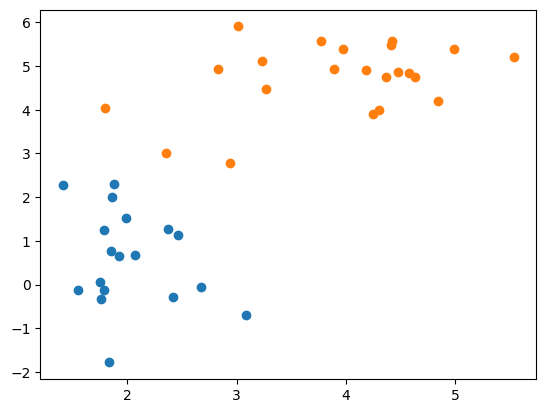

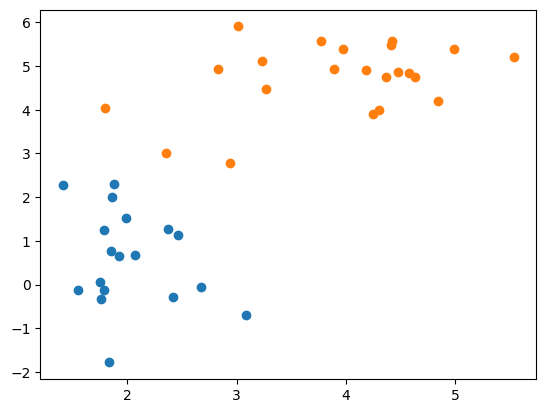

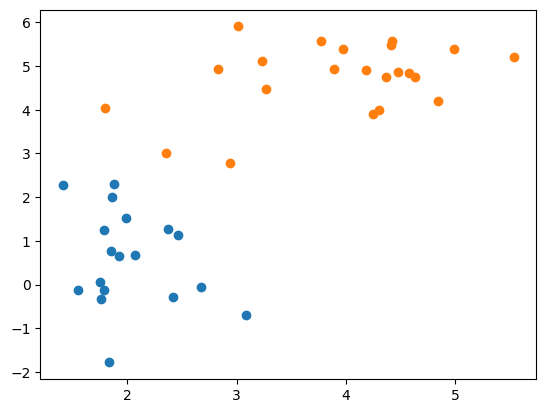

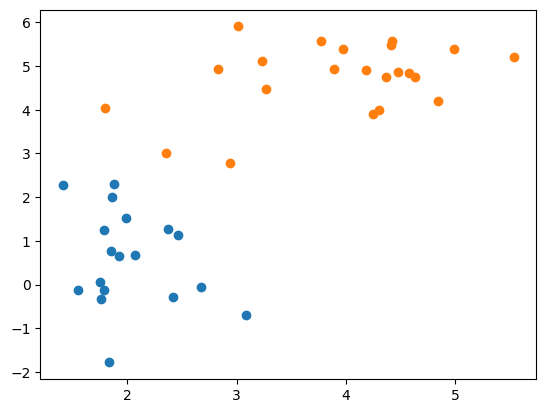

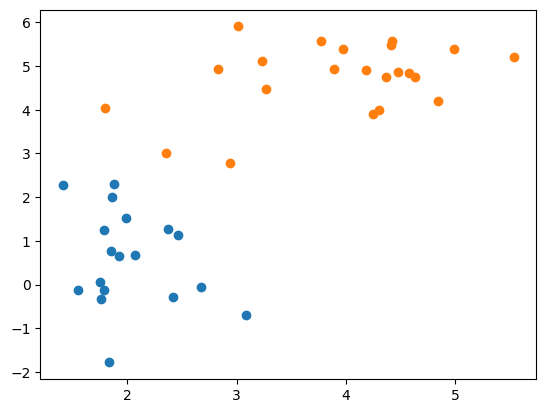

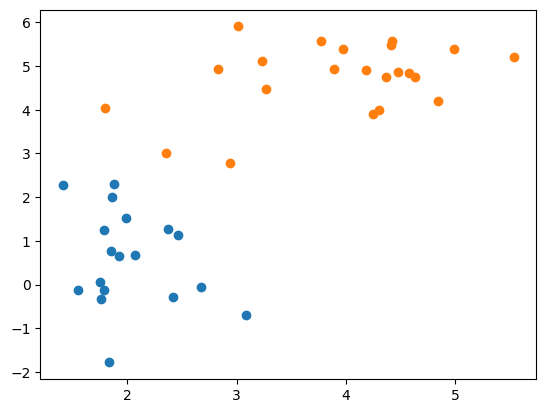

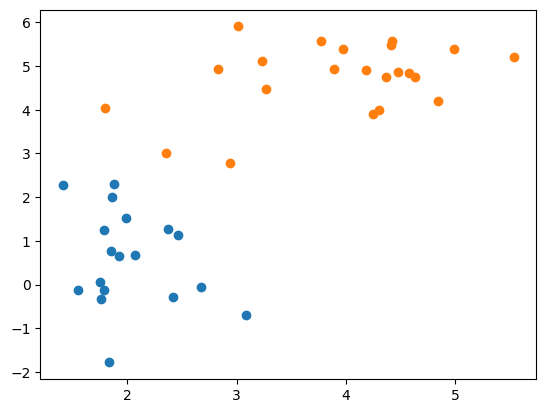

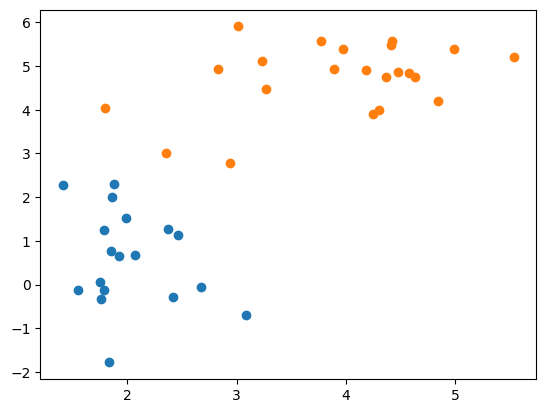

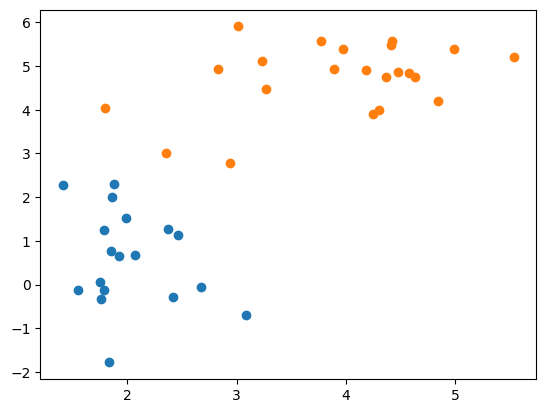

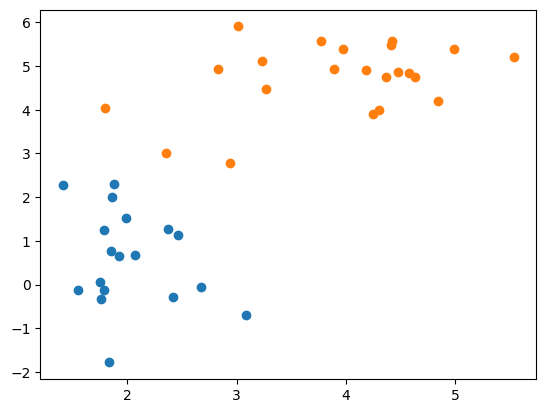

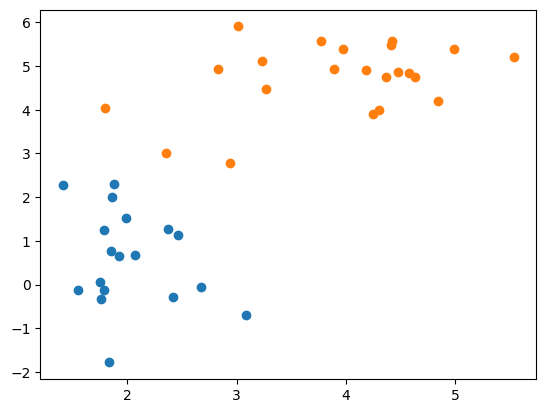

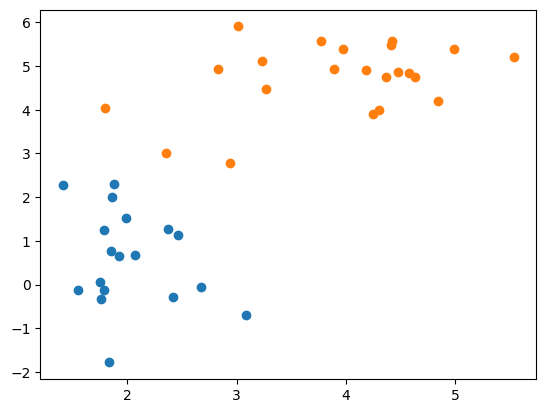

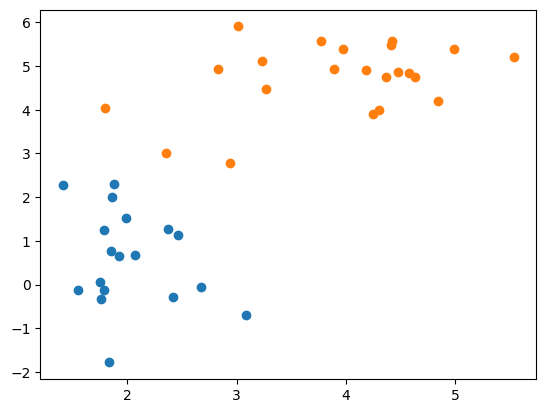

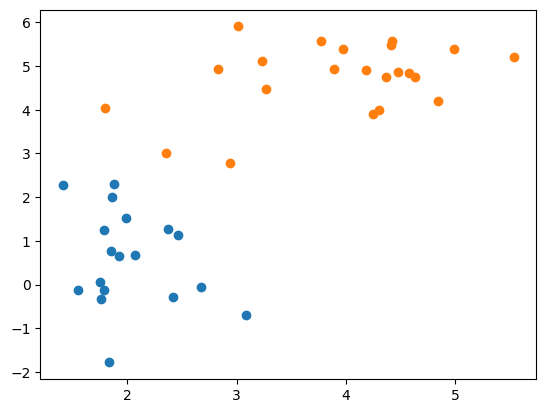

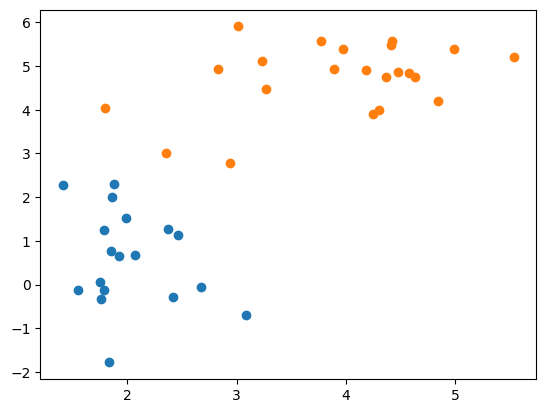

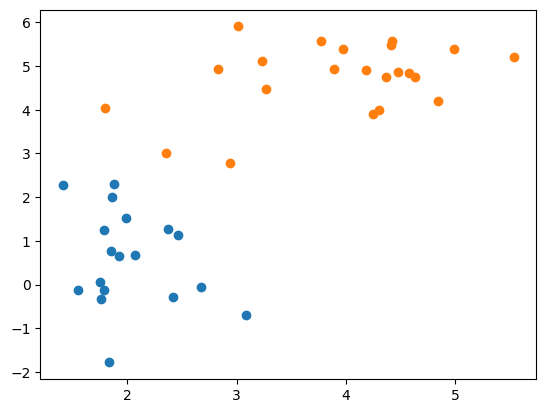

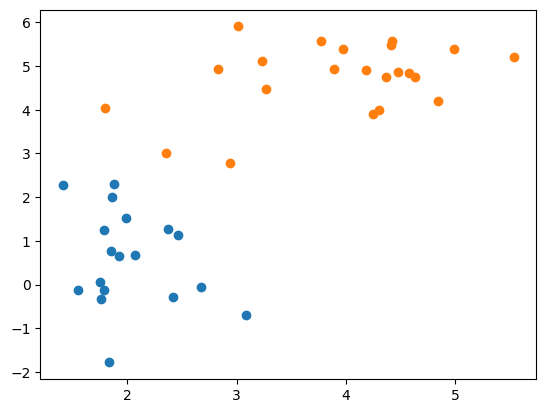

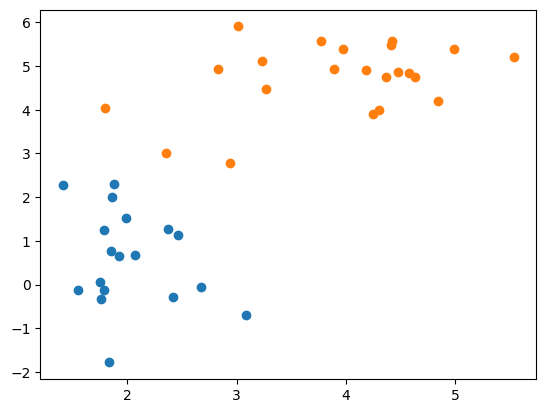

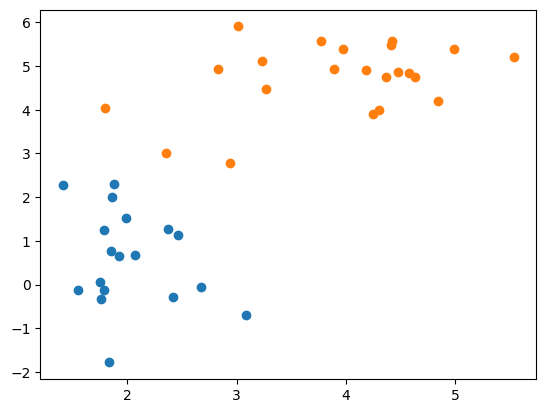

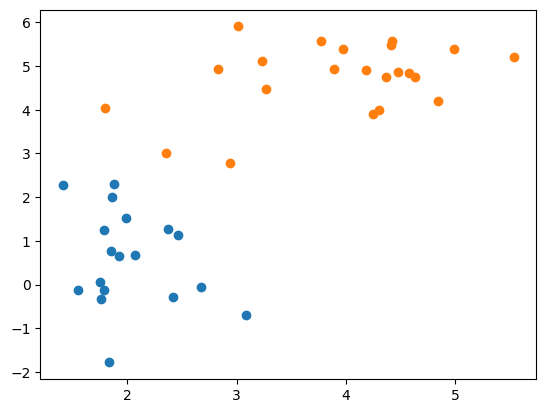

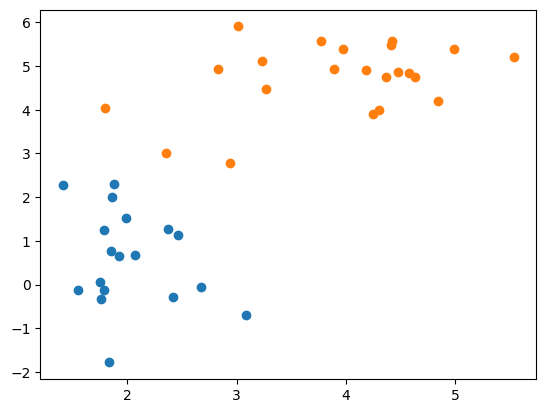

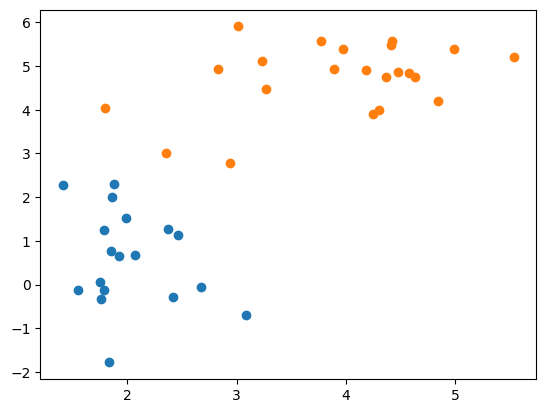

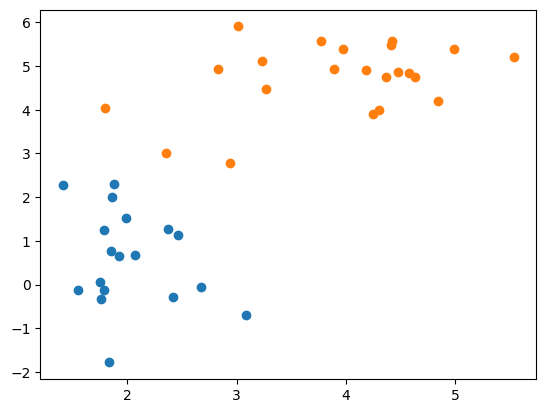

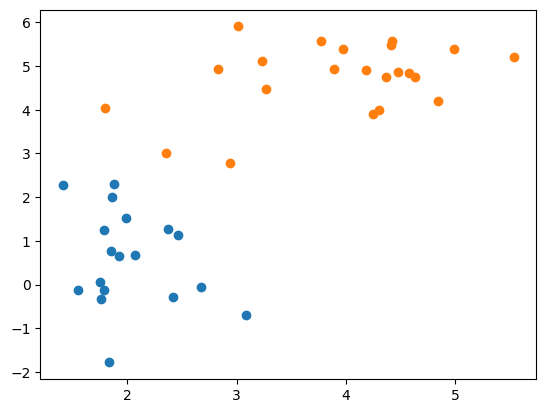

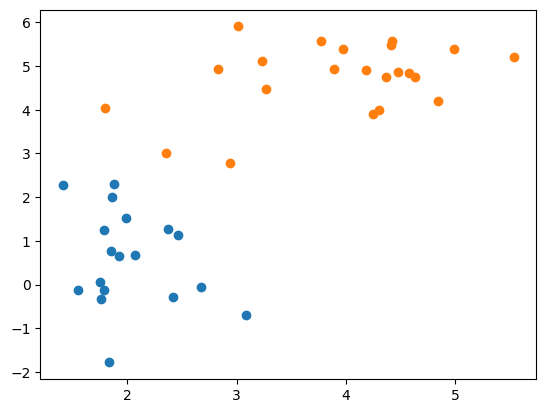

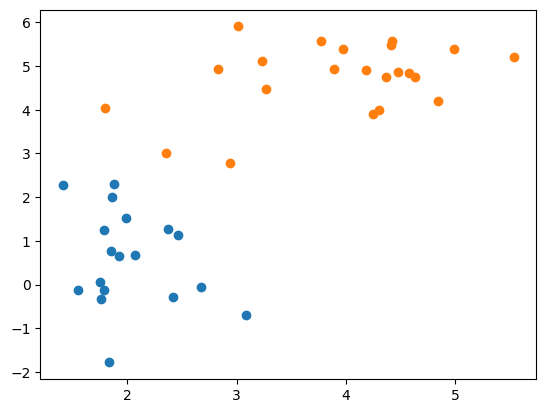

In [11]:
i=100
kmeans(i,xs,ys,x1,y1,x2,y2)

### Exercise

Can you make this work for 3 clusters? Note that the code section below is another way you can randomise your selection of the centroids.

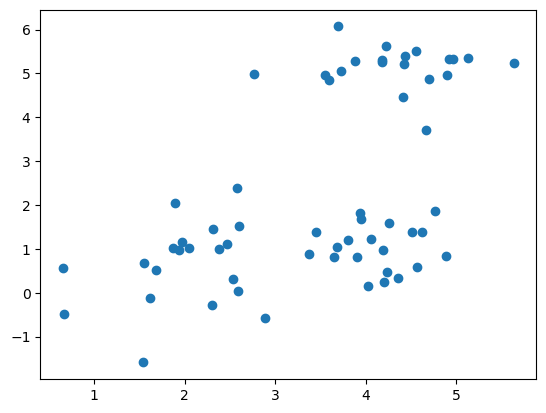

In [12]:
# Generate 20 random data points for group A,B and C using a normal distribution
xsA=np.random.normal(2, 0.5, 20)
ysA=np.random.normal(1, 1, 20)

xsB=np.random.normal(4, 0.8, 20)
ysB=np.random.normal(5, 0.5, 20)

xsC = np.random.normal(4, 0.5, 20)
ysC = np.random.normal(1, 0.5, 20)

# Concatenate x and y coordinates of groups A, B, and C
xs = np.concatenate((xsA, xsB, xsC))
ys = np.concatenate((ysA, ysB, ysC))

# Randomly select a unique index i1 from the combined dataset
i1 = np.random.randint(0, len(xs) - 1)
# Ensure i2 is unique compared to i1
while True:
    i2 = np.random.randint(0, len(xs) - 1)
    if i1 != i2:
        break
# Ensure i3 is unique compared to both i1 and i2
while True:        
    i3 = np.random.randint(0, len(xs) - 1)
    if i1 != i3 and i2 != i3:
        break

# Extract the coordinates of the three uniquely chosen points
x1 = xs[i1]
y1 = ys[i1]
x2 = xs[i2]
y2 = ys[i2]
x3 = xs[i3]
y3 = ys[i3]

# # Plotting all points in the combined dataset
plt.scatter(xs, ys)
plt.show()


In [13]:
# def findclusters2(xs,ys,x1,y1,x2,y2,x3,y3):
#     ### WRITE CODE HERE

In [14]:
# Uncomment when you finished the exercise!

# # The number of iterations to perform
# i = 100

# def kmeans2(i,xs,ys,x1,y1,x2,y2,x3,y3):
#     for j in range(i):
#         # Assign each point to the nearest cluster center
#         Axs, Ays, Bxs, Bys, Cxs, Cys = findclusters2(xs, ys, x1, y1, x2, y2, x3, y3)
        
#         # Update the cluster centers to the average of the points assigned to them
#         x1, y1 = average(Axs, Ays)
#         x2, y2 = average(Bxs, Bys)
#         x3, y3 = average(Cxs, Cys)

# # Call the kmeans2 function with the initial cluster centers and data points
# kmeans2(i, xs, ys, x1, y1, x2, y2, x3, y3)

## Chapter 4.2 Clustering Techniques - K-Means Clustering (using `sk_learn`)

While we have looked through how to do K-Mean Clustering on scratch, using `scikit-learn` (often imported as sklearn) to perform K-Means clustering is far more efficient due to sklearn's efficient implementation of the machine learning algorithms such as K-Means.

Now, let's use the Iris dataset, which is a classic in the field of machine learning and statistics, often used for demonstrating various algorithms including clustering, specifically K-Means clustering. It consists of 150 samples from each of three species of Iris (Iris setosa, Iris versicolour, and Iris virginica), with four features measured for each sample: the length and the width of the sepals and petals, in centimeters.

In [15]:
iris_df = sns.load_dataset('iris')

In [16]:
# Extracting the dataset's features
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
X = iris_df[numeric_cols]

# Create a KMeans model with 3 clusters and fitting it with the unlabelled data
model = KMeans(n_clusters=3, random_state=42).fit(X)

# Extrating the model's labels
X['Labels'] = model.labels_

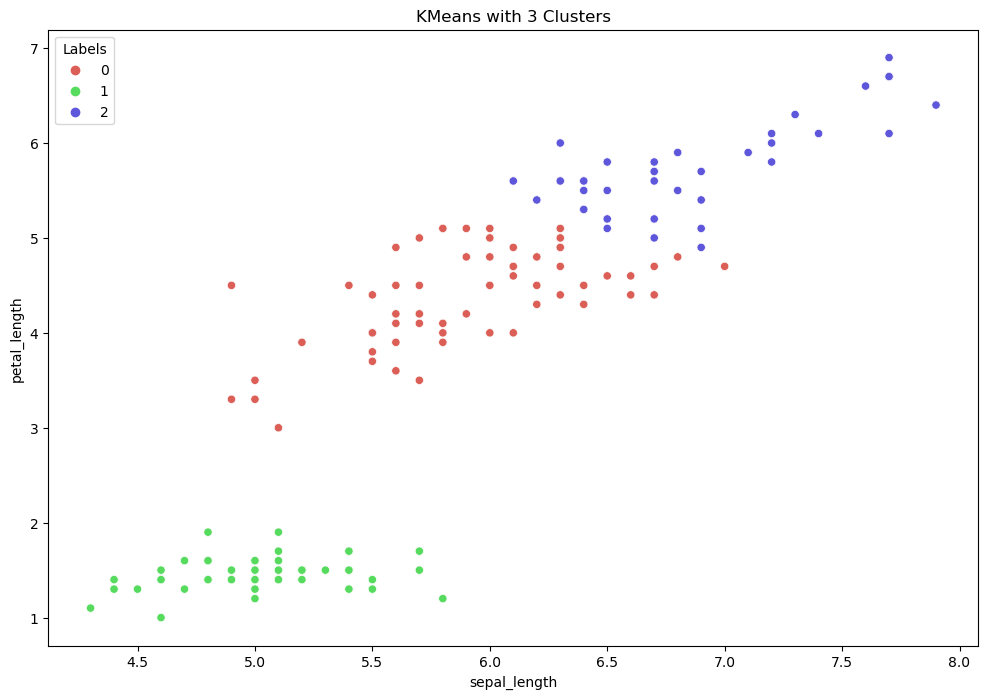

In [17]:
# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sepal_length', y='petal_length', hue='Labels', data=X, palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

## Chapter 4.3 Clustering Techniques - K-Means Clustering (Elbow Method)

The elbow method is a crucial technique to determine the optimal number of clusters in a dataset in K-means clustering.

In the elbow method, the total inertia is calculated for various numbers of clusters. The total inertia is expected to decrease as the number of clusters increases because the clusters will generally be smaller and tighter, making the sum of squared distances within each cluster smaller. The plot of inertia versus the number of clusters will typically show a rapid decrease in inertia as the number of clusters increases, followed by a point where the rate of decrease slows down significantly. This point, resembling an "elbow," suggests the optimal number of clusters to use because further increases in the number of clusters do not result in significant improvements in inertia, indicating that the additional clusters are not capturing substantial new structure in the data.

The following code section shows how you can perform the elbow method on the iris dataset using K-Means.

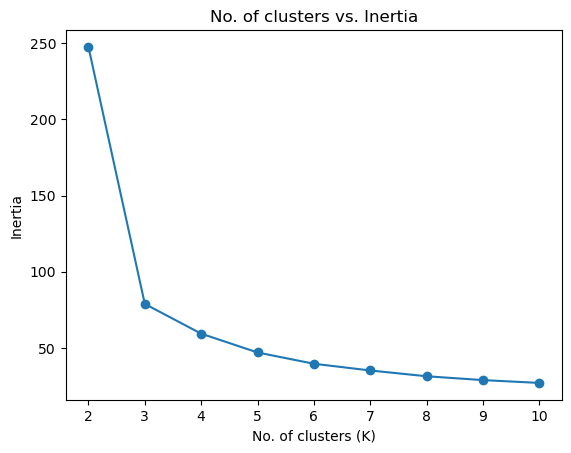

In [18]:
# Define the range of cluster numbers to test
options = range(2, 11)  # Cluster numbers from 2 to 10
inertias = []  # List to store the inertia values for each number of clusters

# Loop through each possible number of clusters
for n_clusters in options:
    # Create a KMeans model with n_clusters and a fixed random state for reproducibility
    model = KMeans(n_clusters, random_state=42).fit(X)
    
    # Append the model's inertia to the inertias list
    inertias.append(model.inertia_)
    
# Plotting the results
plt.title("No. of clusters vs. Inertia") 
plt.plot(options, inertias, '-o') 
plt.xlabel('No. of clusters (K)') 
plt.ylabel('Inertia') 
plt.show() 


As we can see from the graph, we can say the optimal number of clusters is 3.

## Chapter 4.4 - Combining Unsupervised and Supervised Learning Example

Imagine you're working with a dataset of customer feedback texts for a product. The dataset is vast, and labeling it for sentiment (positive, negative, neutral) is costly and time-consuming.

1. **Unsupervised Learning (Step 1)**: Use clustering algorithms (like K-means) to group similar feedback texts together. This step might reveal natural clusters in the data corresponding to different aspects of the product, such as price, quality, or customer service.

2. **Manual Labeling (Step 2)**: Instead of labeling the entire dataset, you can manually examine a few representative texts from each cluster to understand its predominant sentiment. This process requires much less effort compared to labeling the entire dataset.

3. **Supervised Learning (Step 3)**: Use the insights and partially labeled dataset from steps 1 and 2 to train a supervised learning model (such as a neural network or SVM) to classify the sentiment of the feedback texts. The model benefits from the structure discovered during the unsupervised learning phase, potentially improving its accuracy and efficiency.

This approach leverages unsupervised learning to reduce the workload and improve the efficiency of the supervised learning task, making it a powerful strategy for dealing with large, unlabeled datasets.

Suppose we have a dataset of customer behaviors with features like "time spent on website" and "number of purchases" but without any labels. Our goal is to classify customers into categories based on their loyalty level: High, Medium, or Low.

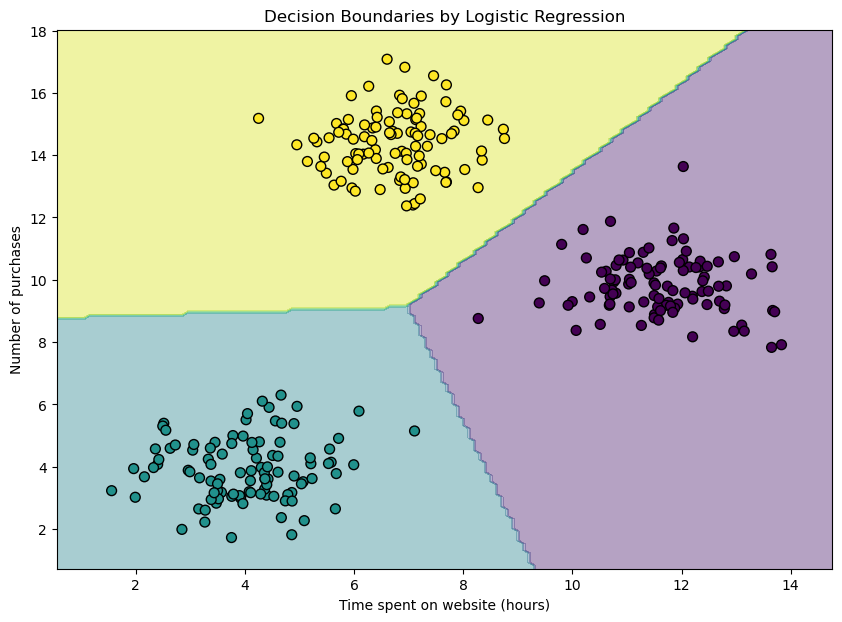

In [19]:
# Generate synthetic data
features, true_labels = make_blobs(n_samples=300, centers=3, n_features=2, center_box = (2, 15), random_state=42)

# Unsupervised Learning - Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)

# Manual Labeling (simulated)
labels = clusters

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Supervised Learning - Classification using Logistic Regression
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision boundaries
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.title("Decision Boundaries by Logistic Regression")
plt.xlabel('Time spent on website (hours)')
plt.ylabel('Number of purchases')
plt.show()

## Chapter 5.1 Clustering Techniques - DBSCAN (from scratch)

Moving onto DBSCAN, we're generating and visualizing a dataset suitable for demonstrating the DBSCAN clustering algorithm. We will be using the `make_moons` function to generate a "two moons" dataset. This dataset is ideal for showcasing DBSCAN due to its ability to handle non-linearly separable data, unlike many other clustering algorithms that require linear separability or a predefined number of clusters.

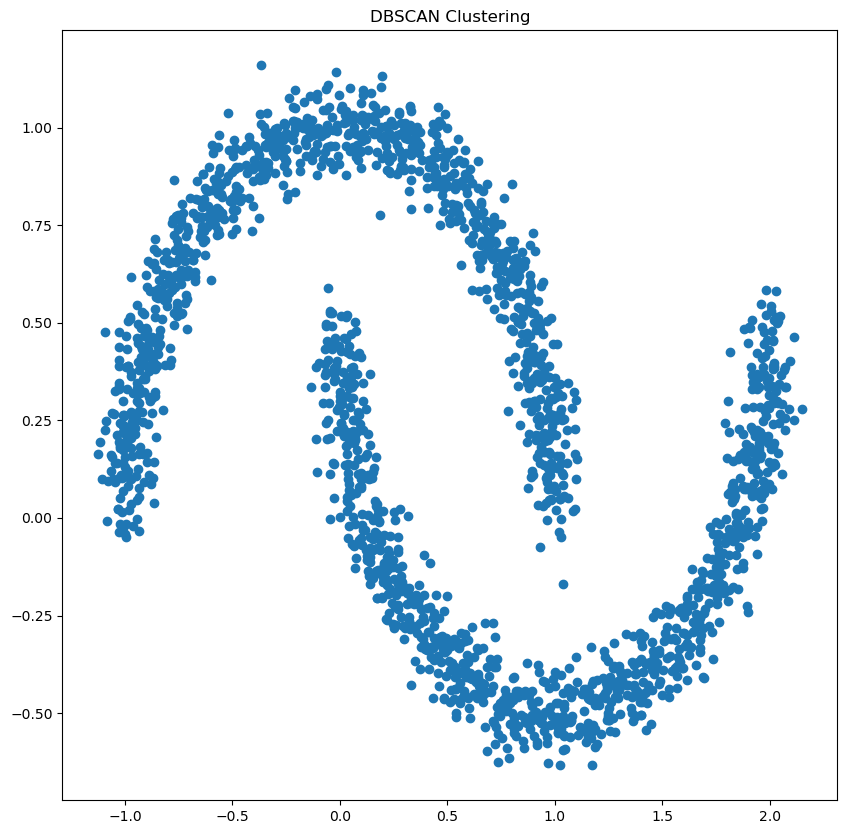

In [20]:
# Generate sample data for K-means and DBSCAN
X_dbscan, _ = make_moons(n_samples=2000, noise=0.06, random_state=42)
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X_dbscan[:, 0], X_dbscan[:, 1])
ax.set_title('DBSCAN Clustering')
plt.show()

The following pseudocode provides a custom implementation of the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm and applies it to the previously generated "two moons" dataset. 

```
Function DBSCAN(X, eps, MinPts):
    Initialize distance_matrix to compute pairwise distances between all points in X
    Initialize labels array to 0 for all points in X
    Set cluster (C) to 0
    
    For each point i in dataset X:
        If point i is already labeled, continue to the next point

        Find neighbors of point i within distance eps

        If number of neighbors < MinPts:
            Label point i as noise (-1)
            Continue to the next point

        Increment C
        Label point i with C

        Initialize k to 0
        While k < length of neighbors:
            Set j to neighbors[k]

            If point j is labeled as noise:
                Label point j with C

            If point j is unlabeled:
                Label point j with C

                Find new neighbors of point j within distance eps
                If new neighbors >= MinPts:
                    Append new neighbors to the list of neighbors

            Increment k

    Return labels
```

### Exercise: 

Using the pseudocode and the code template below, finish the code for the DBSCAN algorithm. You should use `np.where` within your code.

In [21]:
# def dbscan(X, eps, MinPts):
#     # Initialisation
#     distance_matrix = np.sqrt(((X - X[:, np.newaxis])**2).sum(axis=2))
#     labels = np.zeros(X.shape[0])
#     C = 0
    

#     for i in range(X.shape[0]):
#         ### CODE HERE
            
#         # Adding all points density-reachable from it to the cluster.
#         while k < len(neighbors):
#             ### CODE HERE
            
#     return labels

In [22]:
# Uncomment when you finished the exercise!

# # Apply DBSCAN to the generated data
# labels_dbscan = dbscan(X_dbscan, eps=0.1, MinPts=5)

# # Plotting
# fig, ax = plt.subplots(figsize=(10, 10))
# ax.scatter(X_dbscan[:, 0], X_dbscan[:, 1], c=labels_dbscan, cmap='viridis', marker='o', edgecolor='k', s=50)
# ax.set_title('DBSCAN Clustering')
# plt.show()

## Chapter 5.2 Clustering Techniques - DBSCAN (using `sk_learn`)

Both K-means and DBSCAN serve different purposes and are chosen based on the specific requirements of the dataset and the problem at hand. K-means is preferred for its simplicity and efficiency in scenarios where clusters are globular and roughly the same size, however there are cases where K-means isn't particularly a great solution.

We shall be using `sk_learn` for both K-means and DBSCAN to compare how both algorithms perform on a particular dataset.

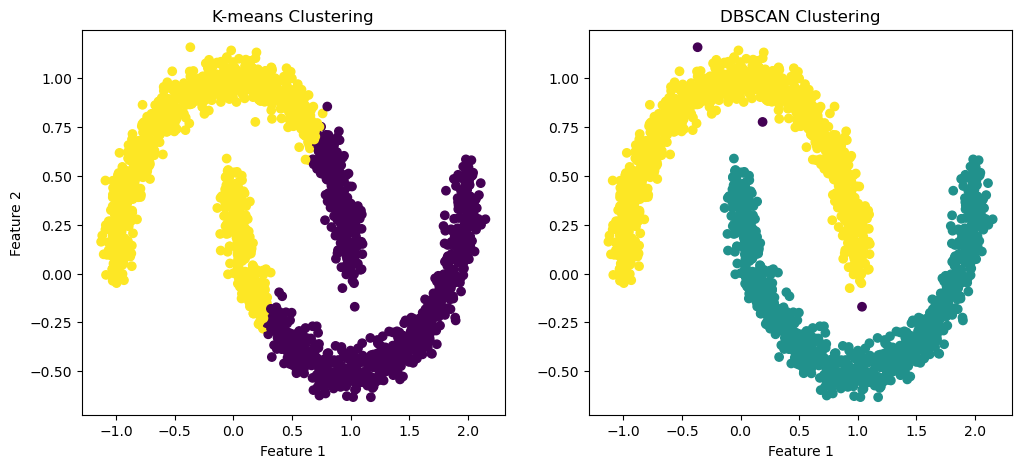

In [23]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# Generate data
X, _ = make_moons(n_samples=2000, noise=0.06, random_state=42)

# K-means clustering for comparison
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='viridis', label='K-means Clustering')
ax1.set_title('K-means Clustering')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ax2.scatter(X[:,0], X[:,1], c=y_dbscan, cmap='viridis', label='DBSCAN Clustering')
ax2.set_title('DBSCAN Clustering')
ax2.set_xlabel('Feature 1')

plt.show()

## Chapter 6. Evaluation Metrics for Classification Models

We will be going into how to evaluate the performance of learning models, delving into various evaluation metrics. This knowledge is essential for applying machine learning techniques effectively, enabling the extraction of valuable insights from unlabeled data in real-world applications.

After the unsupervised model has been trained, you can evaluate, interpret, or further analyze the outcomes using labels that were not part of the training process. This step is often used to understand how well the patterns or clusters discovered by the unsupervised model align with known labels or categories. This phase can involve comparing the unsupervised learning outcomes against the labels using various metrics, but it does not change the nature of the initial training process as being unsupervised.

Before going into the evaluation metrics we need to understand what are True Positives (TP), True Negatives (TN), False Positive (FP), and False Negative (FN). Let’s try to understand TP, FP, FN, TN with an example of pregnancy analogy.


- **True Positive**: We predicted positive and it’s true. In the image, we predicted that a woman is pregnant and she actually is.
- **True Negative**: We predicted negative and it’s true. In the image, we predicted that a man is not pregnant and he actually is not.
- **False Positive (Type 1 Error)**: We predicted positive and it’s false. In the image, we predicted that a man is pregnant but he actually is not.
- **False Negative (Type 2 Error)**: We predicted negative and it’s false. In the image, we predicted that a woman is not pregnant but she actually is.

Now we can show the evaluation metrics that is used in machine learning.

### 1. Accuracy

Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions.

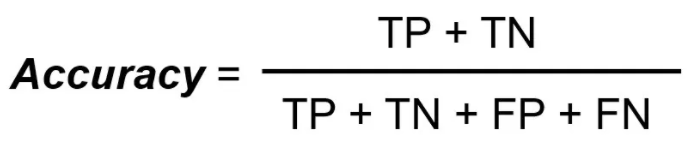

When any model gives an accuracy rate of 99%, you might think that model is performing very good but this is not always true and can be misleading in some situations. I am going to explain this with the help of an example.

Accuracy is useful when the target class is well balanced but is not a good choice for the unbalanced classes. Imagine the scenario where we had 99 images of the dog and only 1 image of a cat present in our training data. Then our model would always predict the dog, and therefore we got 99% accuracy. In reality, Data is always imbalanced for example Spam email, credit card fraud, and medical diagnosis. Hence, if we want to do a better model evaluation and have a full picture of the model evaluation, other metrics such as recall and precision should also be considered.

### 2. Confusion Matrix

Confusion Matrix is a performance measurement for the machine learning classification problems where the output can be two or more classes. It is a table with combinations of predicted and actual values.

***A confusion matrix is defined as thetable that is often used to describe the performance of a classification model on a set of the test data for which the true values are known.***

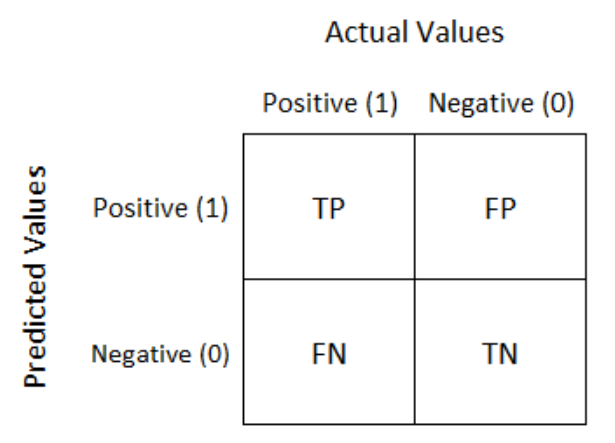

We discussed accuracy, now let’s discuss some other metrics of the confusion matrix

### 3. Precision 
It explains how many of the correctly predicted cases actually turned out to be positive. Precision is useful in the cases where False Positive is a higher concern than False Negatives. The importance of Precision is in music or video recommendation systems, e-commerce websites, etc. where wrong results could lead to customer churn and this could be harmful to the business.

***Precision for a label is defined as the number of true positives divided by the number of predicted positives.***
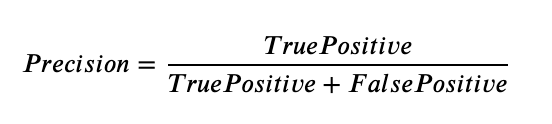

### 4. Recall (Sensitivity)
 It explains how many of the actual positive cases we were able to predict correctly with our model. Recall is a useful metric in cases where False Negative is of higher concern than False Positive. It is important in medical cases where it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected!

***Recall for a label is defined as the number of true positives divided by the total number of actual positives.***
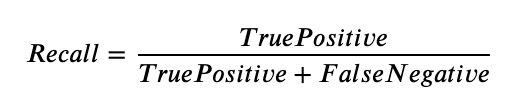

### 5. F1 Score 
It gives a combined idea about Precision and Recall metrics. It is maximum when Precision is equal to Recall.

***F1 Score is the harmonic mean of precision and recall.***
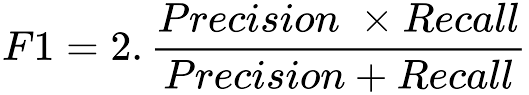

Precision and recall offer a trade-off, i.e., one metric comes at the cost of another. More precision involves a harsher critic (classifier) that doubts even the actual positive samples from the dataset, thus reducing the recall score. On the other hand, more recall entails a lax critic that allows any sample that resembles a positive class to pass, which makes border-case negative samples classified as “positive,” thus reducing the precision. Ideally, we want to maximize both precision and recall metrics to obtain the perfect classifier.

The F1 score combines precision and recall using their harmonic mean, and maximizing the F1 score implies simultaneously maximizing both precision and recall. Thus, the F1 score has become the choice of researchers for evaluating their models in conjunction with accuracy.

### 6. AUC-ROC

The Receiver Operator Characteristic (ROC) is a probability curve that plots the TPR(True Positive Rate) against the FPR(False Positive Rate) at various threshold values and separates the ‘signal’ from the ‘noise’.

The **Area Under the Curve (AUC)** is the measure of the ability of a classifier to distinguish between classes. From the graph, we simply say the area of the curve ABDE and the X and Y-axis.

From the graph shown below, the greater the AUC, the better is the performance of the model at different threshold points between positive and negative classes. This simply means that When AUC is equal to 1, the classifier is able to perfectly distinguish between all Positive and Negative class points. When AUC is equal to 0, the classifier would be predicting all Negatives as Positives and vice versa. When AUC is 0.5, the classifier is not able to distinguish between the Positive and Negative classes.

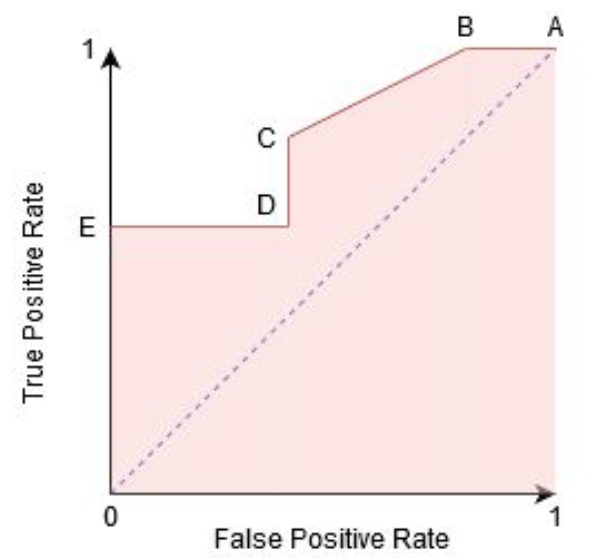

In a ROC curve, the X-axis value shows False Positive Rate (FPR),  and Y-axis shows True Positive Rate (TPR). Higher the value of X means higher the number of False Positives(FP) than True Negatives(TN), while a higher Y-axis value indicates a higher number of TP than FN. So, the choice of the threshold depends on the ability to balance between FP and FN.

### 7. Log Loss 
Log-loss, also known as logistic loss or cross-entropy loss, is a performance metric for evaluating the accuracy of a classifier. It measures the uncertainty of the probabilities predicted by a model, penalizing predictions that are confidently incorrect. Log-loss is particularly useful because it takes into account the probability estimates of a prediction, not just the final outcome, making it sensitive to the degree of correctness. 

For a single sample with true label y∈{0,1} and a probability estimate p=Pr(y=1), the log loss is:
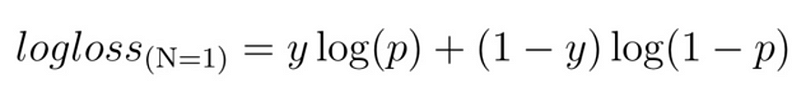

This makes it a good metric for models where predicting the precise probabilities of each class is crucial, such as in many binary and multiclass classification problems. It encourages models to be confident in their predictions, as long as they are correct, thereby improving the reliability of the model's probability estimates.

Here is the code example on how you can calculate the metrics on a binary classification dataset.

In [24]:
# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate log loss
log_loss_value = log_loss(y_test, y_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {auc_roc}")
print(f"Log Loss value: {log_loss_value}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.855
Precision: 0.9148936170212766
Recall: 0.8037383177570093
F1 Score: 0.8557213930348259
AUC-ROC: 0.9216159179981912
Log Loss value: 0.36860437093933235
Confusion Matrix:
[[85  8]
 [21 86]]


Before we can calculating the metrics on a multiclass dataset, there are a things we need to take note of:

In a multiclass classification scenario, the AUC-ROC metric, which measures the ability of a classifier to distinguish between classes, is traditionally defined for binary classification tasks. To extend the AUC-ROC metric to multiclass classification, the One-vs-Rest approach is applied. Here's how it works:
- **Binary Decomposition:** For each class, a binary problem is created where the current class is considered as the "positive" class, and all other classes are combined to form the "negative" class. This process is repeated for each class in the dataset, leading to as many binary classification problems as there are classes.
- **Binary AUC-ROC Calculation:** For each binary problem, the AUC-ROC score is calculated, giving a measure of how well the model can distinguish between the current "positive" class and all other classes.
- **Aggregation:** The individual AUC-ROC scores from the binary decompositions are then aggregated to produce a single metric. The aggregation can be done in several ways, such as averaging the AUC-ROC scores across all classes. The average can be unweighted (mean AUC-ROC) or weighted by the prevalence of each class in the dataset (which is what we will be using).


For confusion matrix, it expands from the simple 2x2 format used in binary classification to a larger matrix that can accommodate the increased number of classes. For a classification problem with N classes, the confusion matrix will be an N x N matrix, where each row represents the true class, and each column represents the predicted class. The diagonal elements of the matrix represent the number of correct predictions for each class, while the off-diagonal elements indicate the misclassifications.

Consider a classification problem with three classes (Class 1, Class 2, and Class 3). A confusion matrix for this problem might look like this:

$$
\begin{array}{cccc}
 & \text{Predicted: Class 1} & \text{Predicted: Class 2} & \text{Predicted: Class 3} \\
\text{Actual: Class 1} & 50 & 2 & 3 \\
\text{Actual: Class 2} & 5 & 45 & 5 \\
\text{Actual: Class 3} & 2 & 4 & 49 \\
\end{array}
$$

In this matrix:
- The diagonal elements (50, 45, 49) indicate the number of times each class was correctly predicted.
- The off-diagonal elements show the misclassifications, such as:
  - 2 instances of Class 1 were incorrectly predicted as Class 2.
  - 5 instances of Class 2 were incorrectly predicted as Class 1, and so on.

In [25]:
# Generate a synthetic multiclass classification dataset
X, y = make_classification(n_samples=2000, n_features=20, n_classes=3, n_clusters_per_class=1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression classifier with multi_class option
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)  # Get probabilities for all classes

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Adjusted for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # Adjusted for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')  # Adjusted for multiclass
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate log loss
log_loss_value = log_loss(y_test, y_prob)

# For multiclass AUC-ROC, we need a different approach
# One common approach is to calculate ROC AUC score in a One-vs-Rest manner and then average across all classes
auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')  # Adjusted for multiclass

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {auc_roc}")
print(f"Log Loss value: {log_loss_value}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.91
Precision: 0.9138282088092384
Recall: 0.91
F1 Score: 0.9098189480031061
AUC-ROC: 0.9580213107982513
Log Loss value: 0.38922364142313415
Confusion Matrix:
[[103  13   6]
 [  0 141  12]
 [  3   2 120]]


## Chapter 7. Sandbox Mode

Using the Mall Customer Segmentation Data which is a data set created for the learning purpose of the customer segmentation concepts , also known as market basket analysis. Using the knowledge we have been learning throughout today to find out any patterns within the dataset.

Feel free to mess around with the dataset, make any analysis, and support your analysis with the metrics and any extra infomation.

In [26]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
